In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
Company = pd.read_excel('Company_Data2015-1.xlsx')

#Glimpse of Data
Company.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [3]:
Company.columns = Company.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/', '_to_').str.replace('-', '_').str.replace('[', '_').str.replace(']', '_')

In [4]:
Company.head()

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,...,PBIDTM_perc_Latest_,PBITM_perc_Latest_,PBDTM_perc_Latest_,CPM_perc_Latest_,APATM_perc_Latest_,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [5]:
print('The number of rows (observations) is',Company.shape[0],'\n''The number of columns (variables) is',Company.shape[1])

The number of rows (observations) is 3586 
The number of columns (variables) is 67


In [6]:
Company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth_Next_Year                   3586 non-null   float64
 3   Equity_Paid_Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital_Employed                     3586 non-null   float64
 6   Total_Debt                           3586 non-null   float64
 7   Gross_Block_                         3586 non-null   float64
 8   Net_Working_Capital_                 3586 non-null   float64
 9   Current_Assets_                      3586 non-null   float64
 10  Current_Liabilities_and_Provisions_  3586 non-null   float64
 11  Total_Assets_to_Liabilities_  

In [7]:
Company.describe().T

,count,mean,std,min,25%,50%,75%,max
Co_Code,3586.0,16065.388734,19776.817379,4.00,3029.2500,6077.500,24269.5000,72493.00
Networth_Next_Year,3586.0,725.045251,4769.681004,-8021.60,3.9850,19.015,123.8025,111729.10
Equity_Paid_Up,3586.0,62.966584,778.761744,0.00,3.7500,8.290,19.5175,42263.46
Networth,3586.0,649.746299,4091.988792,-7027.48,3.8925,18.580,117.2975,81657.35
Capital_Employed,3586.0,2799.611054,26975.135385,-1824.75,7.6025,39.090,226.6050,714001.25
...,...,...,...,...,...,...,...,...
Debtors_Velocity_Days,3586.0,603.894032,10636.759580,0.00,8.0000,49.000,106.0000,514721.00
Creditors_Velocity_Days,3586.0,2057.854992,54169.479197,0.00,8.0000,39.000,89.0000,2034145.00
Inventory_Velocity_Days,3483.0,79.644559,137.847792,-199.00,0.0000,35.000,96.0000,996.00
Value_of_Output_to_Total_Assets,3586.0,0.819757,1.201400,-0.33,0.0700,0.480,1.1600,17.63


In [8]:
pd.options.display.float_format = '{:.2f}'.format   

Company.describe().T

,count,mean,std,min,25%,50%,75%,max
Co_Code,3586.00,16065.39,19776.82,4.00,3029.25,6077.50,24269.50,72493.00
Networth_Next_Year,3586.00,725.05,4769.68,-8021.60,3.98,19.02,123.80,111729.10
Equity_Paid_Up,3586.00,62.97,778.76,0.00,3.75,8.29,19.52,42263.46
Networth,3586.00,649.75,4091.99,-7027.48,3.89,18.58,117.30,81657.35
Capital_Employed,3586.00,2799.61,26975.14,-1824.75,7.60,39.09,226.60,714001.25
...,...,...,...,...,...,...,...,...
Debtors_Velocity_Days,3586.00,603.89,10636.76,0.00,8.00,49.00,106.00,514721.00
Creditors_Velocity_Days,3586.00,2057.85,54169.48,0.00,8.00,39.00,89.00,2034145.00
Inventory_Velocity_Days,3483.00,79.64,137.85,-199.00,0.00,35.00,96.00,996.00
Value_of_Output_to_Total_Assets,3586.00,0.82,1.20,-0.33,0.07,0.48,1.16,17.63


In [9]:
Company.duplicated().sum()

0

In [10]:
Company.isnull().sum().sum()

118

In [11]:
pd.set_option('display.max_rows',1000)
Company.isna().sum().sort_values(ascending=False)

Inventory_Velocity_Days                103
Book_Value_Adj._Unit_Curr                4
Interest_Cover_Ratio_Latest_             1
PBITM_perc_Latest_                       1
Fixed_Assets_Ratio_Latest_               1
Inventory_Ratio_Latest_                  1
Debtors_Ratio_Latest_                    1
Total_Asset_Turnover_Ratio_Latest_       1
PBIDTM_perc_Latest_                      1
PBDTM_perc_Latest_                       1
CPM_perc_Latest_                         1
APATM_perc_Latest_                       1
Current_Ratio_Latest_                    1
ROG_Net_Sales_perc                       0
ROG_Cost_of_Production_perc              0
ROG_Total_Assets_perc                    0
ROG_PBIDT_perc                           0
Co_Code                                  0
ROG_PBIT_perc                            0
ROG_Gross_Sales_perc                     0
ROG_Gross_Block_perc                     0
ROG_Capital_Employed_perc                0
ROG_PBDT_perc                            0
ROG_Market_

In [12]:
Company.skew().sort_values(ascending=True)

APATM_perc_Latest_                    -49.28
PBDTM_perc_Latest_                    -47.75
CPM_perc_Latest_                      -47.01
PBITM_perc_Latest_                    -36.00
PBIDTM_perc_Latest_                   -30.93
Cash_Flow_From_Investing_Activities   -21.57
Co_Code                                 1.60
Cash_Flow_From_Financing_Activities     1.70
Inventory_Velocity_Days                 3.49
Value_of_Output_to_Total_Assets         4.70
Cash_Flow_From_Operating_Activities     6.63
Total_Asset_Turnover_Ratio_Latest_     10.36
Networth                               11.74
Networth_Next_Year                     13.04
PAT                                    13.07
PBT                                    13.13
PBIDT                                  13.18
Total_Assets_to_Liabilities_           13.37
PBDT                                   13.56
Adjusted_PAT                           13.88
PBIT                                   14.01
CP                                     14.35
Market_Cap

In [13]:
Company.drop(['Co_Code', 'Co_Name'], inplace = True, axis=1)

In [14]:
def univariateAnalysis_numeric(column,nbins):
    
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' \n\n') 

In [15]:
Company_num = Company.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(Company_num.columns.values)
len(lstnumericcolumns)

65

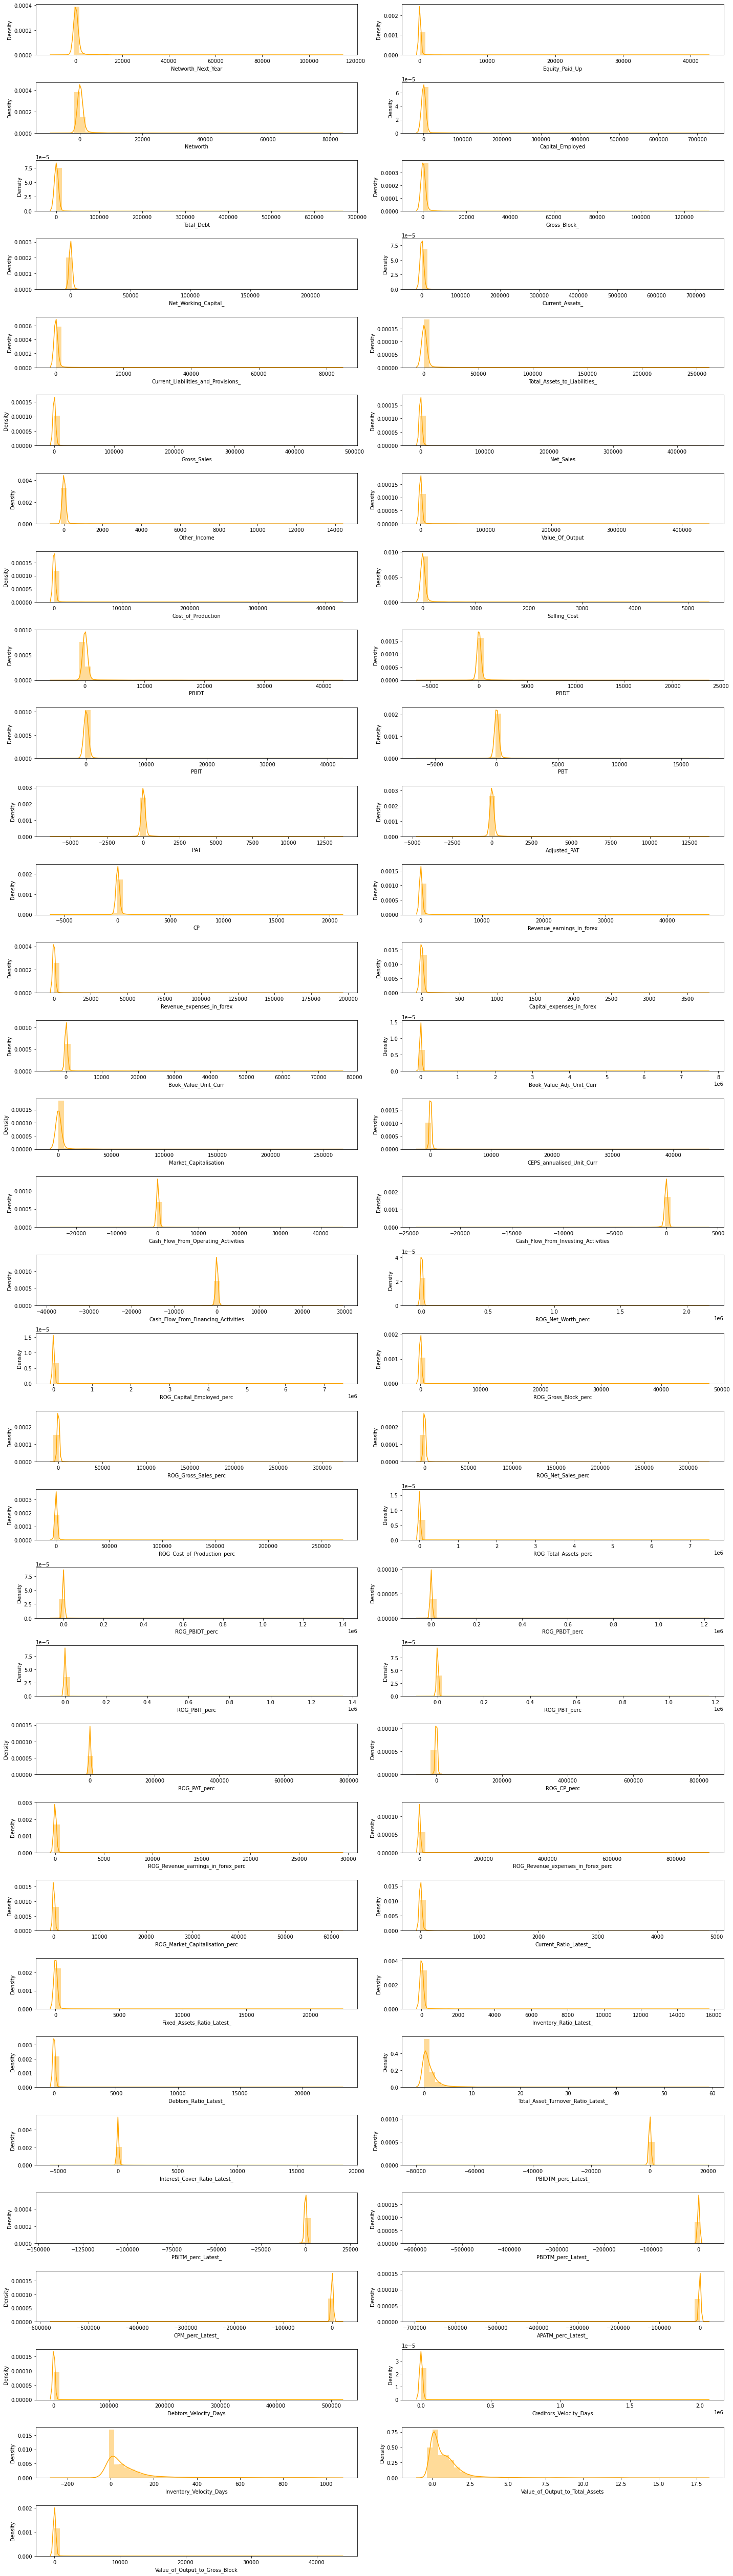

In [16]:
cont=Company_num.dtypes[Company_num.dtypes!='object'].index
dist_plot=Company_num
fig=plt.figure(figsize=(20,70))
for i in range(0,len(cont)):
    ax=fig.add_subplot(33,2,i+1)
    sns.distplot(dist_plot[dist_plot.columns[i]],kde=True, color= 'orange')
#     plt.savefig('Distplot.png')
    plt.tight_layout()

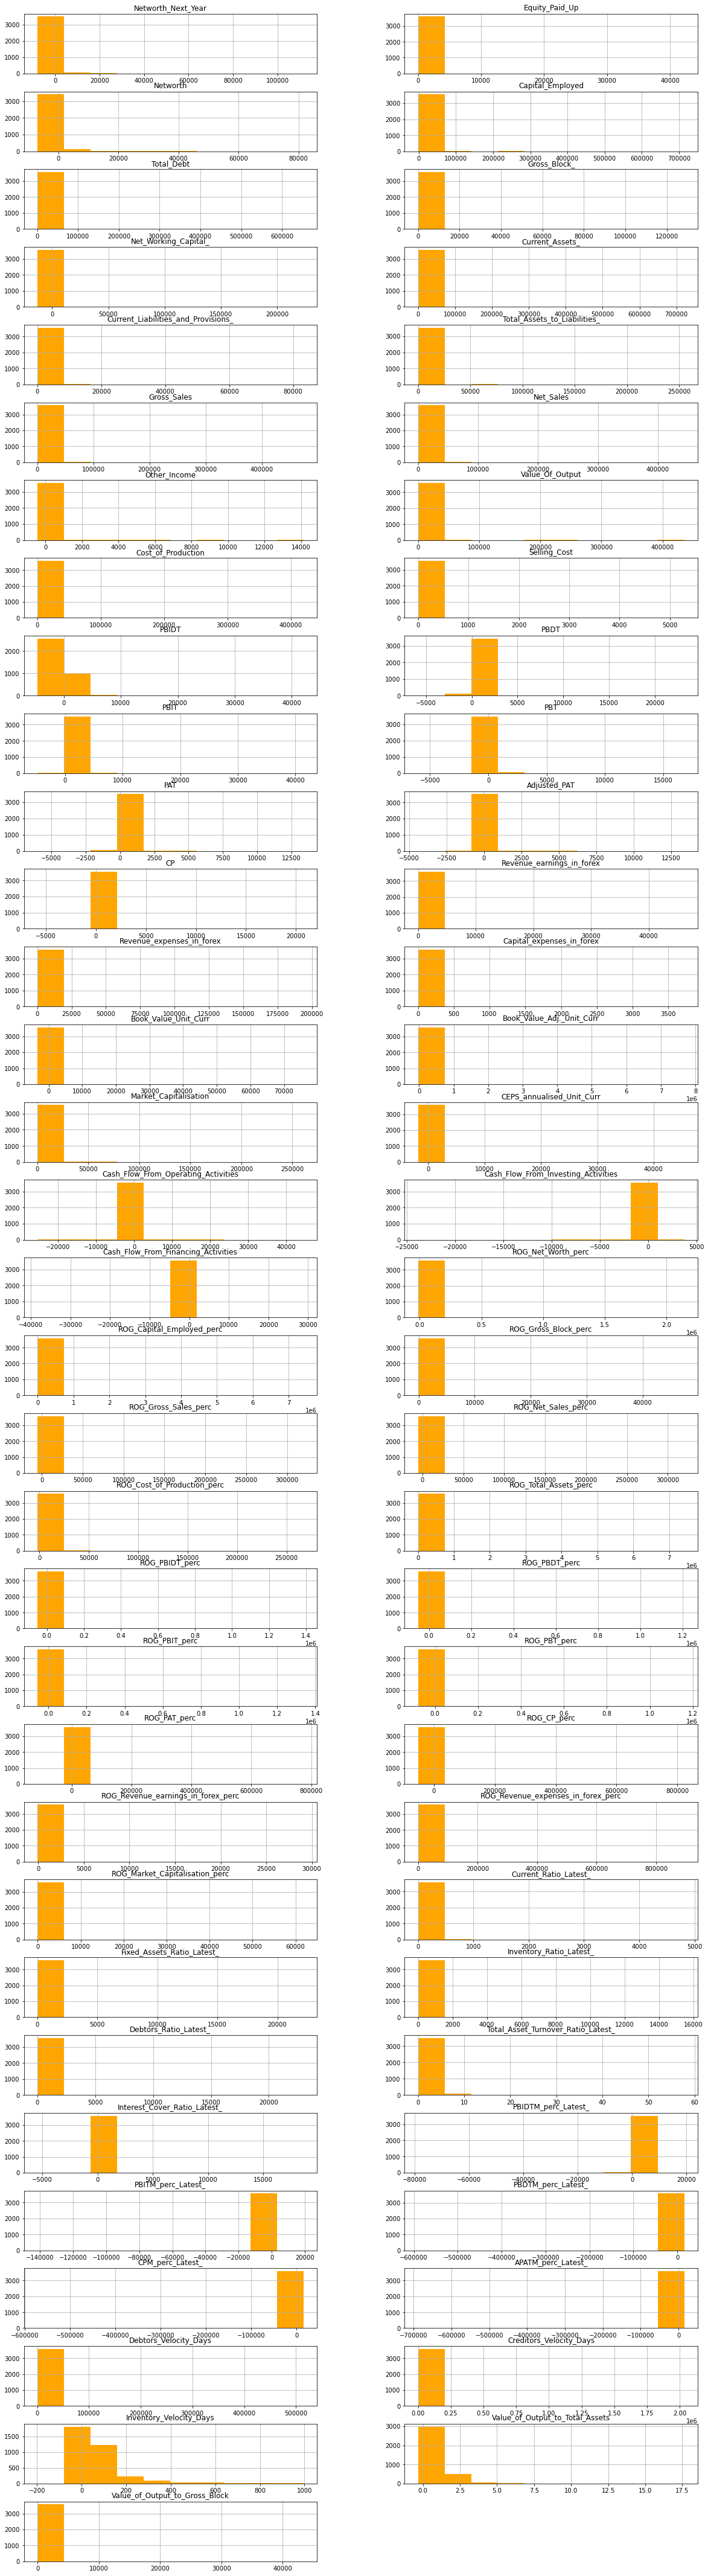

In [17]:
Company.hist(figsize=(20,80),layout=(34,2),color='orange')
# plt.savefig('Histogram.png')
plt.show()

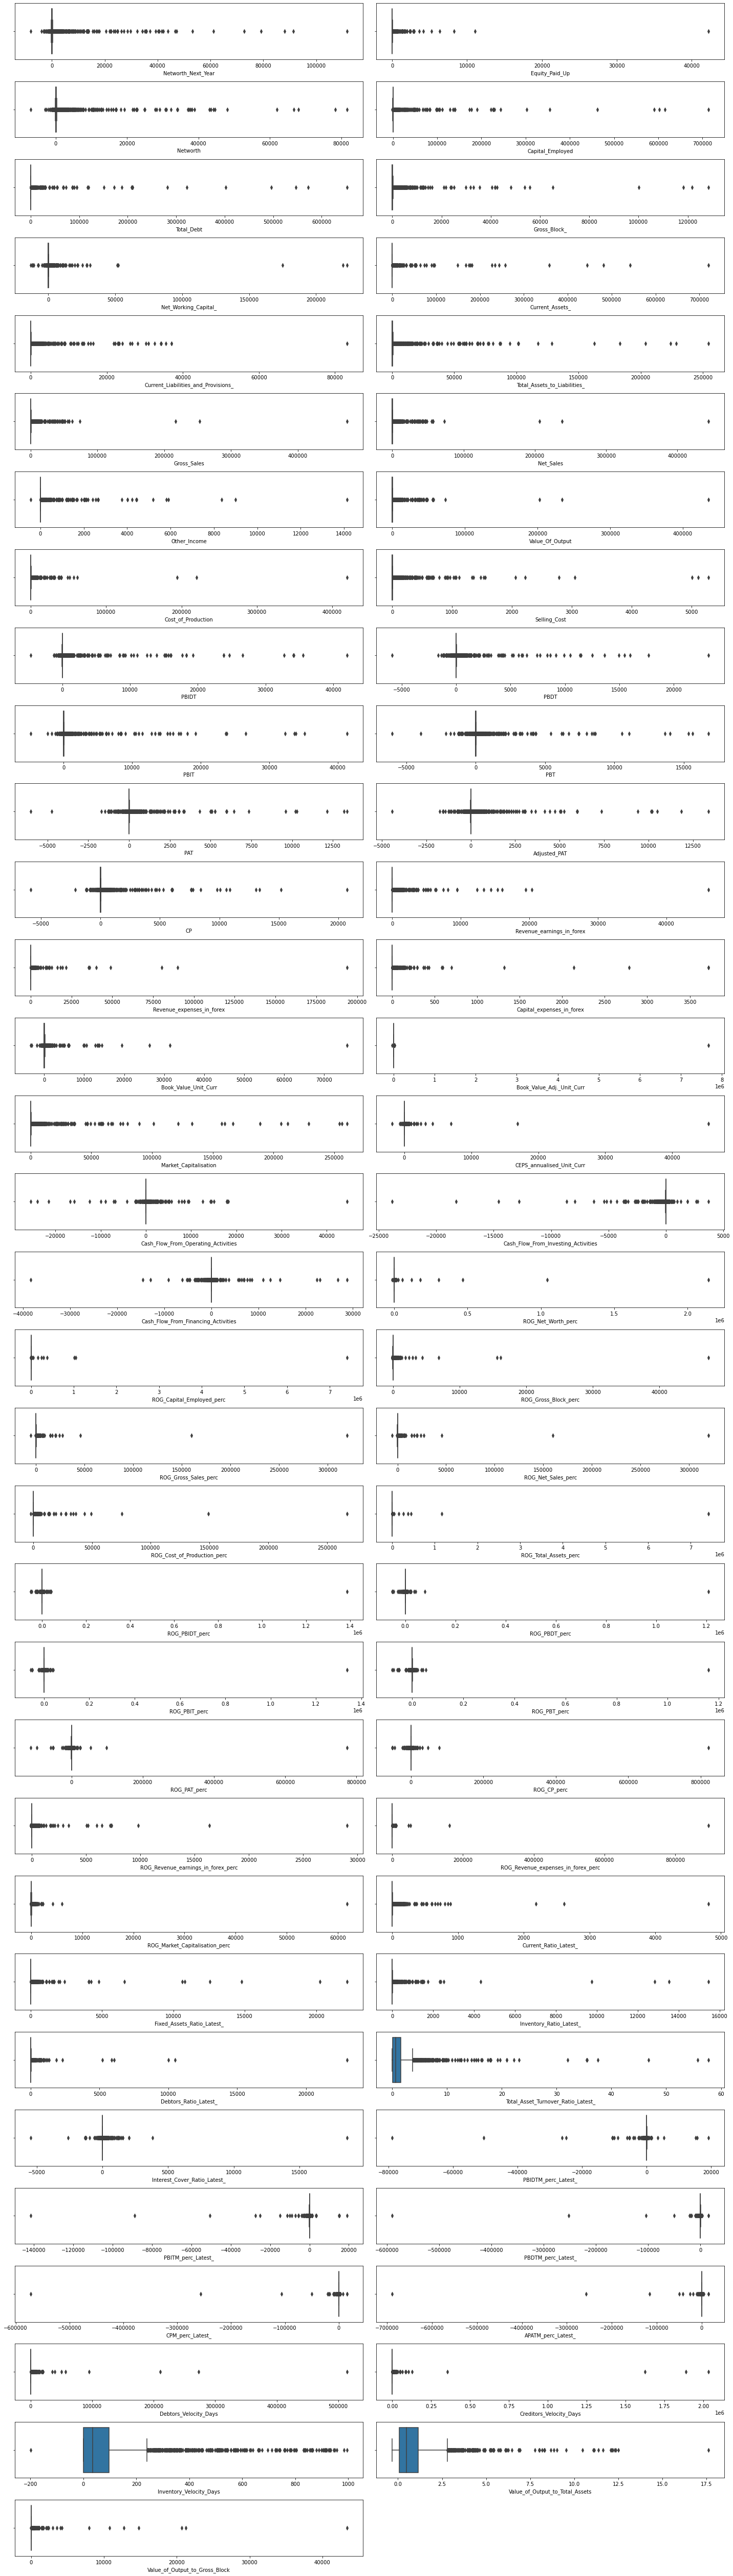

In [18]:
fig=plt.figure(figsize=(20,70))
for i in range(0,len(cont)):
    ax=fig.add_subplot(33,2,i+1)
    sns.boxplot(Company_num[cont[i]])
#     plt.savefig('Outliers.png')
    plt.tight_layout()

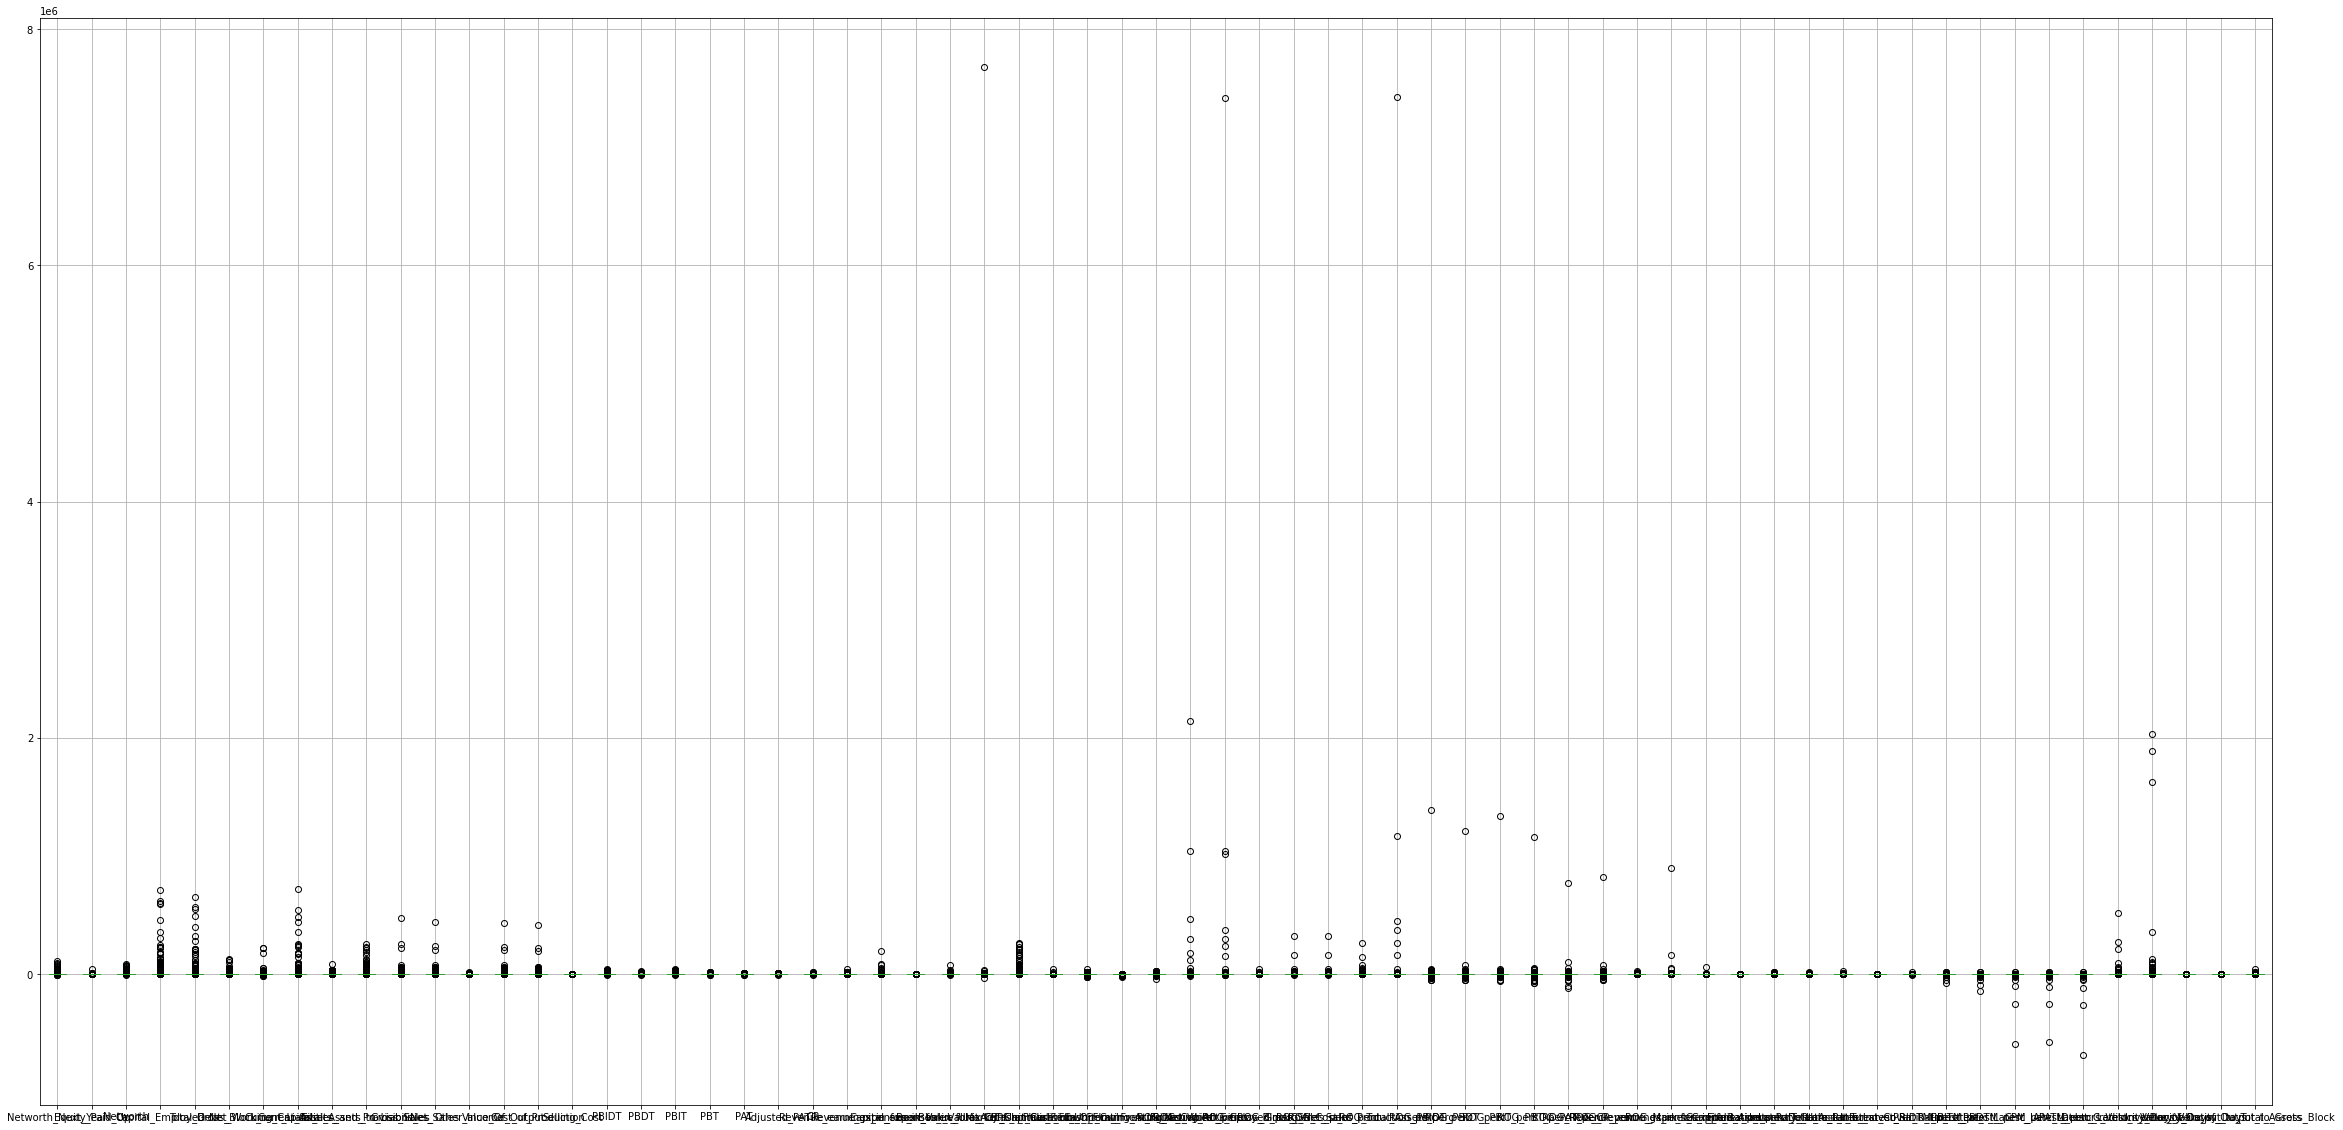

In [19]:
plt.figure(figsize=(40,20))
Company.boxplot()
plt.show()

In [20]:
Company['default'] = np.where((Company['Networth_Next_Year'] > 0), 0, 1)

In [21]:
Company['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

<AxesSubplot:xlabel='default', ylabel='count'>

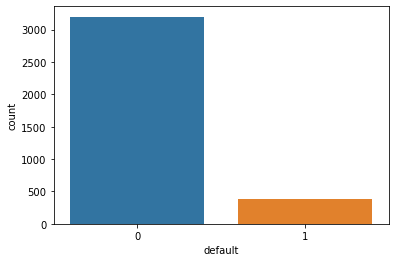

In [22]:
sns.countplot(Company['default'])

In [23]:
Company['default'].value_counts(normalize = True)

0   0.89
1   0.11
Name: default, dtype: float64

In [24]:
Company.isnull().sum()

Networth_Next_Year                       0
Equity_Paid_Up                           0
Networth                                 0
Capital_Employed                         0
Total_Debt                               0
Gross_Block_                             0
Net_Working_Capital_                     0
Current_Assets_                          0
Current_Liabilities_and_Provisions_      0
Total_Assets_to_Liabilities_             0
Gross_Sales                              0
Net_Sales                                0
Other_Income                             0
Value_Of_Output                          0
Cost_of_Production                       0
Selling_Cost                             0
PBIDT                                    0
PBDT                                     0
PBIT                                     0
PBT                                      0
PAT                                      0
Adjusted_PAT                             0
CP                                       0
Revenue_ear

In [25]:
Company.size

236676

In [26]:
Company.isnull().sum().sum()

118

In [27]:
Company_X = Company.drop('default', axis = 1)
Company_Y = Company['default']

In [28]:
Company_X

,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,Current_Liabilities_and_Provisions_,Total_Assets_to_Liabilities_,...,PBIDTM_perc_Latest_,PBITM_perc_Latest_,PBDTM_perc_Latest_,CPM_perc_Latest_,APATM_perc_Latest_,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
0,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,...,0.00,0.00,0.00,0.00,0.00,0,0,45.00,0.00,0.00
1,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.00,0.31,0.24
2,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.00,-0.03,-0.26
3,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.00,0.24,1.90
4,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.00,0.01,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3581,72677.77,501.30,62009.42,590576.00,496009.19,8463.30,0.00,444633.50,32557.39,94566.81,...,0.00,0.00,0.00,0.00,0.00,0,0,NaN,0.60,7.76
3582,79162.19,296.50,34057.87,71906.06,37643.79,29848.44,2503.86,11554.45,9050.59,80956.65,...,39.92,32.17,29.81,30.52,22.77,13,53,77.00,0.29,1.00
3583,88134.31,2427.95,67969.97,140686.75,55245.01,121643.45,6376.84,89609.82,83232.98,223919.73,...,8.09,6.69,7.31,5.69,4.29,7,30,48.00,1.42,3.24
3584,91293.70,8245.46,81657.35,173099.14,85995.34,128477.59,11449.79,42353.59,30903.80,204002.94,...,28.12,20.55,23.39,19.55,11.99,32,69,42.00,0.36,0.68


In [29]:
Q1 = Company_X.quantile(0.25)
Q3 = Company_X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [30]:
((Company_X > UL) | (Company_X < LL)).sum()

Networth_Next_Year                      676
Equity_Paid_Up                          448
Networth                                650
Capital_Employed                        596
Total_Debt                              583
Gross_Block_                            540
Net_Working_Capital_                    625
Current_Assets_                         577
Current_Liabilities_and_Provisions_     581
Total_Assets_to_Liabilities_            574
Gross_Sales                             554
Net_Sales                               556
Other_Income                            603
Value_Of_Output                         559
Cost_of_Production                      560
Selling_Cost                            605
PBIDT                                   671
PBDT                                    815
PBIT                                    720
PBT                                     941
PAT                                     959
Adjusted_PAT                            954
CP                              

In [31]:
Company_X[((Company_X > UL) | (Company_X < LL))]= np.nan

In [32]:
Company_X.isnull().sum()

Networth_Next_Year                      676
Equity_Paid_Up                          448
Networth                                650
Capital_Employed                        596
Total_Debt                              583
Gross_Block_                            540
Net_Working_Capital_                    625
Current_Assets_                         577
Current_Liabilities_and_Provisions_     581
Total_Assets_to_Liabilities_            574
Gross_Sales                             554
Net_Sales                               556
Other_Income                            603
Value_Of_Output                         559
Cost_of_Production                      560
Selling_Cost                            605
PBIDT                                   671
PBDT                                    815
PBIT                                    720
PBT                                     941
PAT                                     959
Adjusted_PAT                            954
CP                              

In [33]:
Company_X.isnull().sum().sum()

42149

In [34]:
Company_X = Company_X.drop(['Networth_Next_Year'], axis = 1)

In [35]:
Company_X.shape

(3586, 64)

In [36]:
Company_sub1 = pd.concat([Company_X, Company_Y], axis =1 )

In [37]:
Company_sub1.isnull().sum(axis = 1)

0       19
1       34
2       43
3       36
4       35
        ..
3581    30
3582    36
3583    34
3584    30
3585    36
Length: 3586, dtype: int64

In [38]:
Company_sub1_temp = Company_sub1[Company_sub1.isnull().sum(axis = 1) <= 5]

In [39]:
Company_sub1_temp.shape

(1203, 65)

In [40]:
Company_sub1_temp['default'].value_counts()

0    1085
1     118
Name: default, dtype: int64

In [41]:
118/388

0.30412371134020616

In [42]:
Company_sub1['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

In [43]:
(Company_sub1.isnull().sum().sort_values(ascending = False)/Company_sub1.index.size).head(15)

ROG_Revenue_expenses_in_forex_perc    0.45
ROG_Revenue_earnings_in_forex_perc    0.37
Cash_Flow_From_Financing_Activities   0.28
PAT                                   0.27
Adjusted_PAT                          0.27
PBT                                   0.26
APATM_perc_Latest_                    0.26
Cash_Flow_From_Investing_Activities   0.24
ROG_Gross_Block_perc                  0.23
CP                                    0.23
PBDT                                  0.23
Cash_Flow_From_Operating_Activities   0.22
ROG_Net_Worth_perc                    0.21
Revenue_earnings_in_forex             0.21
Interest_Cover_Ratio_Latest_          0.20
dtype: float64

In [44]:
Company_sub2 = Company_sub1.drop(['ROG_Revenue_expenses_in_forex_perc', 'ROG_Revenue_earnings_in_forex_perc', 'Cash_Flow_From_Financing_Activities', 'PAT', 'Adjusted_PAT', 'PBT', 'APATM_perc_Latest_', 'Cash_Flow_From_Investing_Activities', 'ROG_Gross_Block_perc', 'CP', 'PBDT', 'Cash_Flow_From_Operating_Activities', 'ROG_Net_Worth_perc', 'Revenue_earnings_in_forex', 'Selling_Cost', 'Inventory_Velocity_Days', 'Revenue_expenses_in_forex'], axis=1)

In [45]:
Company_sub2.shape

(3586, 48)

In [46]:
predictors = Company_sub2.drop('default', axis = 1)
response = Company_sub2['default']

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.columns)

In [48]:
Company_sub3 = pd.concat([scaled_predictors, response], axis = 1)

In [49]:
from sklearn.impute import KNNImputer

In [50]:
imputer = KNNImputer(n_neighbors=10)

In [51]:
Company_imputed = pd.DataFrame(imputer.fit_transform(Company_sub3), columns = Company_sub3.columns)

In [52]:
Company_imputed.isnull().sum()

Equity_Paid_Up                         0
Networth                               0
Capital_Employed                       0
Total_Debt                             0
Gross_Block_                           0
Net_Working_Capital_                   0
Current_Assets_                        0
Current_Liabilities_and_Provisions_    0
Total_Assets_to_Liabilities_           0
Gross_Sales                            0
Net_Sales                              0
Other_Income                           0
Value_Of_Output                        0
Cost_of_Production                     0
PBIDT                                  0
PBIT                                   0
Capital_expenses_in_forex              0
Book_Value_Unit_Curr                   0
Book_Value_Adj._Unit_Curr              0
Market_Capitalisation                  0
CEPS_annualised_Unit_Curr              0
ROG_Capital_Employed_perc              0
ROG_Gross_Sales_perc                   0
ROG_Net_Sales_perc                     0
ROG_Cost_of_Prod

In [53]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([.25,.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [54]:
for column in Company_num[cont].columns:
    lr,ur=remove_outlier(Company_num[column])
    Company_num[column]=np.where(Company_num[column]>ur,ur,Company_num[column])
    Company_num[column]=np.where(Company_num[column]<lr,lr,Company_num[column])

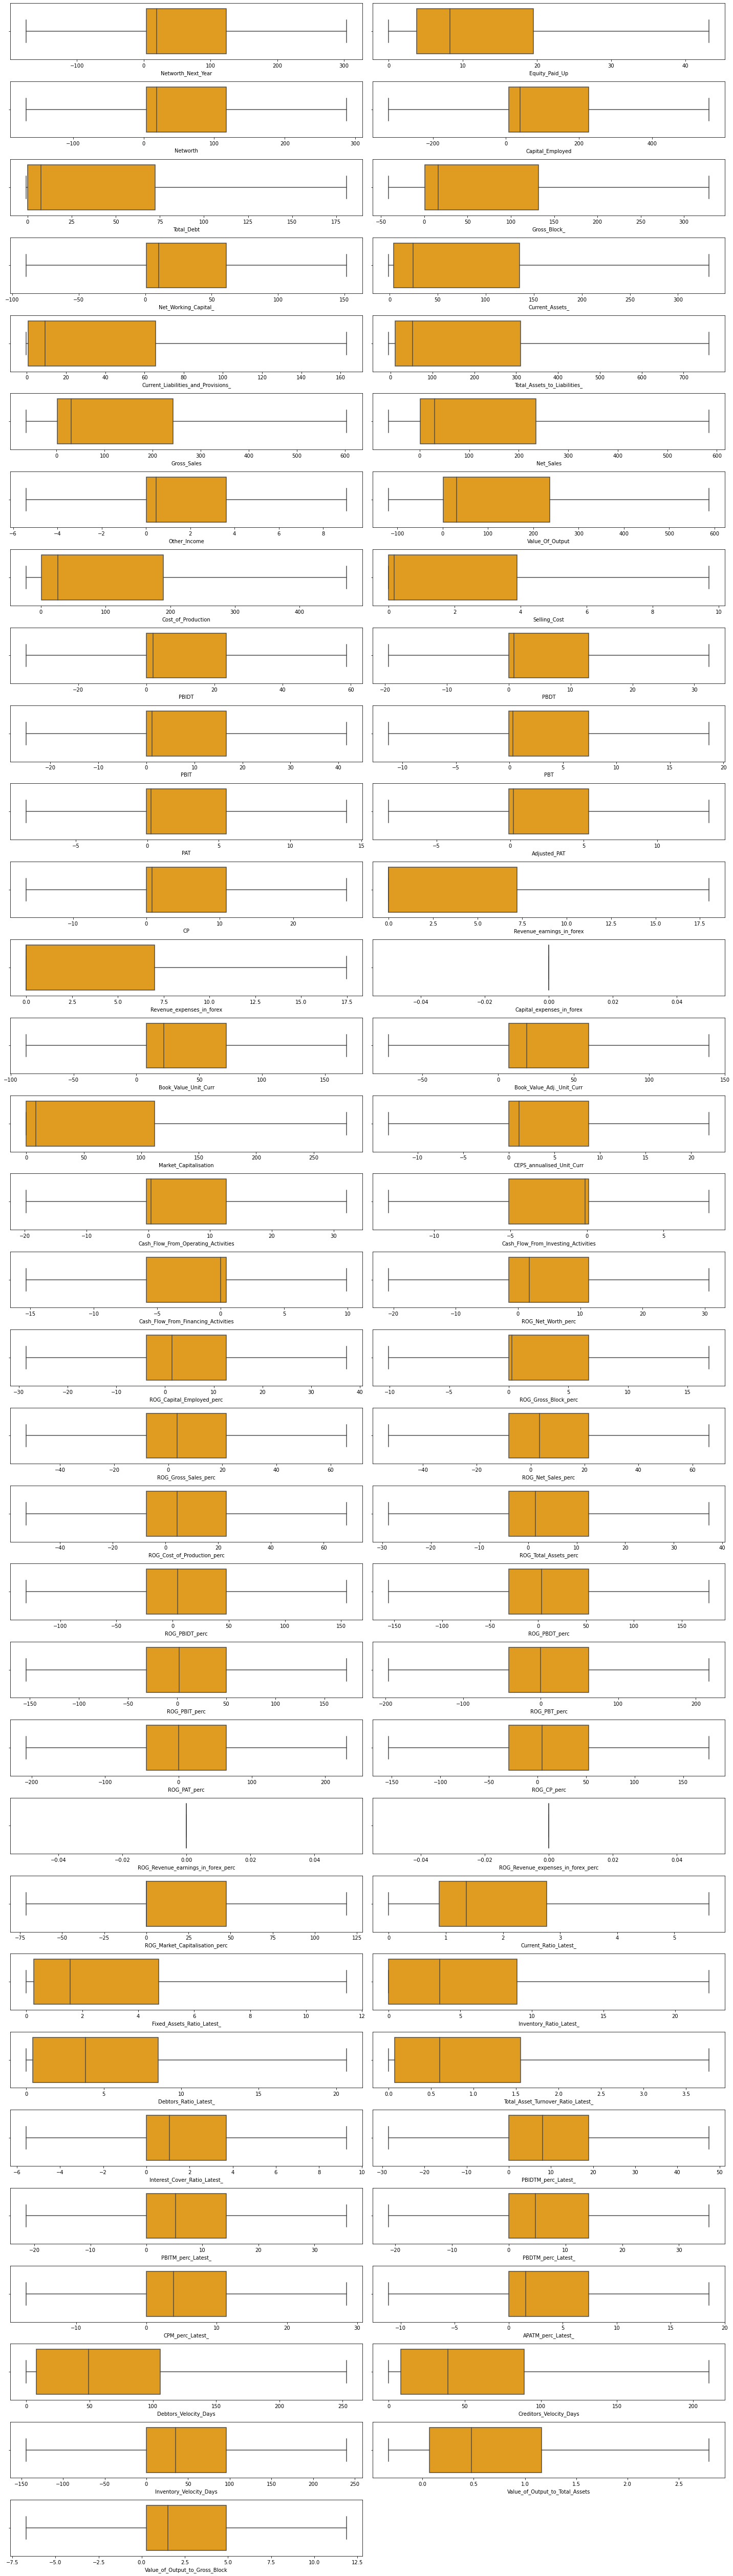

In [55]:
fig=plt.figure(figsize=(20,70))
for i in range(0,len(cont)):
    ax=fig.add_subplot(33,2,i+1)
    sns.boxplot(Company_num[cont[i]], color= 'orange')
#     plt.savefig('Outliers.png')
    plt.tight_layout()

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]),
 [Text(1, 0, 'Networth_Next_Year'),
  Text(2, 0, 'Equity_Paid_Up'),
  Text(3, 0, 'Networth'),
  Text(4, 0, 'Capital_Employed'),
  Text(5, 0, 'Total_Debt'),
  Text(6, 0, 'Gross_Block_'),
  Text(7, 0, 'Net_Working_Capital_'),
  Text(8, 0, 'Current_Assets_'),
  Text(9, 0, 'Current_Liabilities_and_Provisions_'),
  Text(10, 0, 'Total_Assets_to_Liabilities_'),
  Text(11, 0, 'Gross_Sales'),
  Text(12, 0, 'Net_Sales'),
  Text(13, 0, 'Other_Income'),
  Text(14, 0, 'Value_Of_Output'),
  Text(15, 0, 'Cost_of_Production'),
  Text(16, 0, 'Selling_Cost'),
  Text(17, 0, 'PBIDT'),
  Text(18, 0, 'PBDT'),
  Text(19, 0, 'PBIT'),
  Text(20, 0, 'PBT'),
  Text(21, 0, 'PAT'),
  Text(22, 0, 'Adjusted_PAT'),
  Text(23, 0,

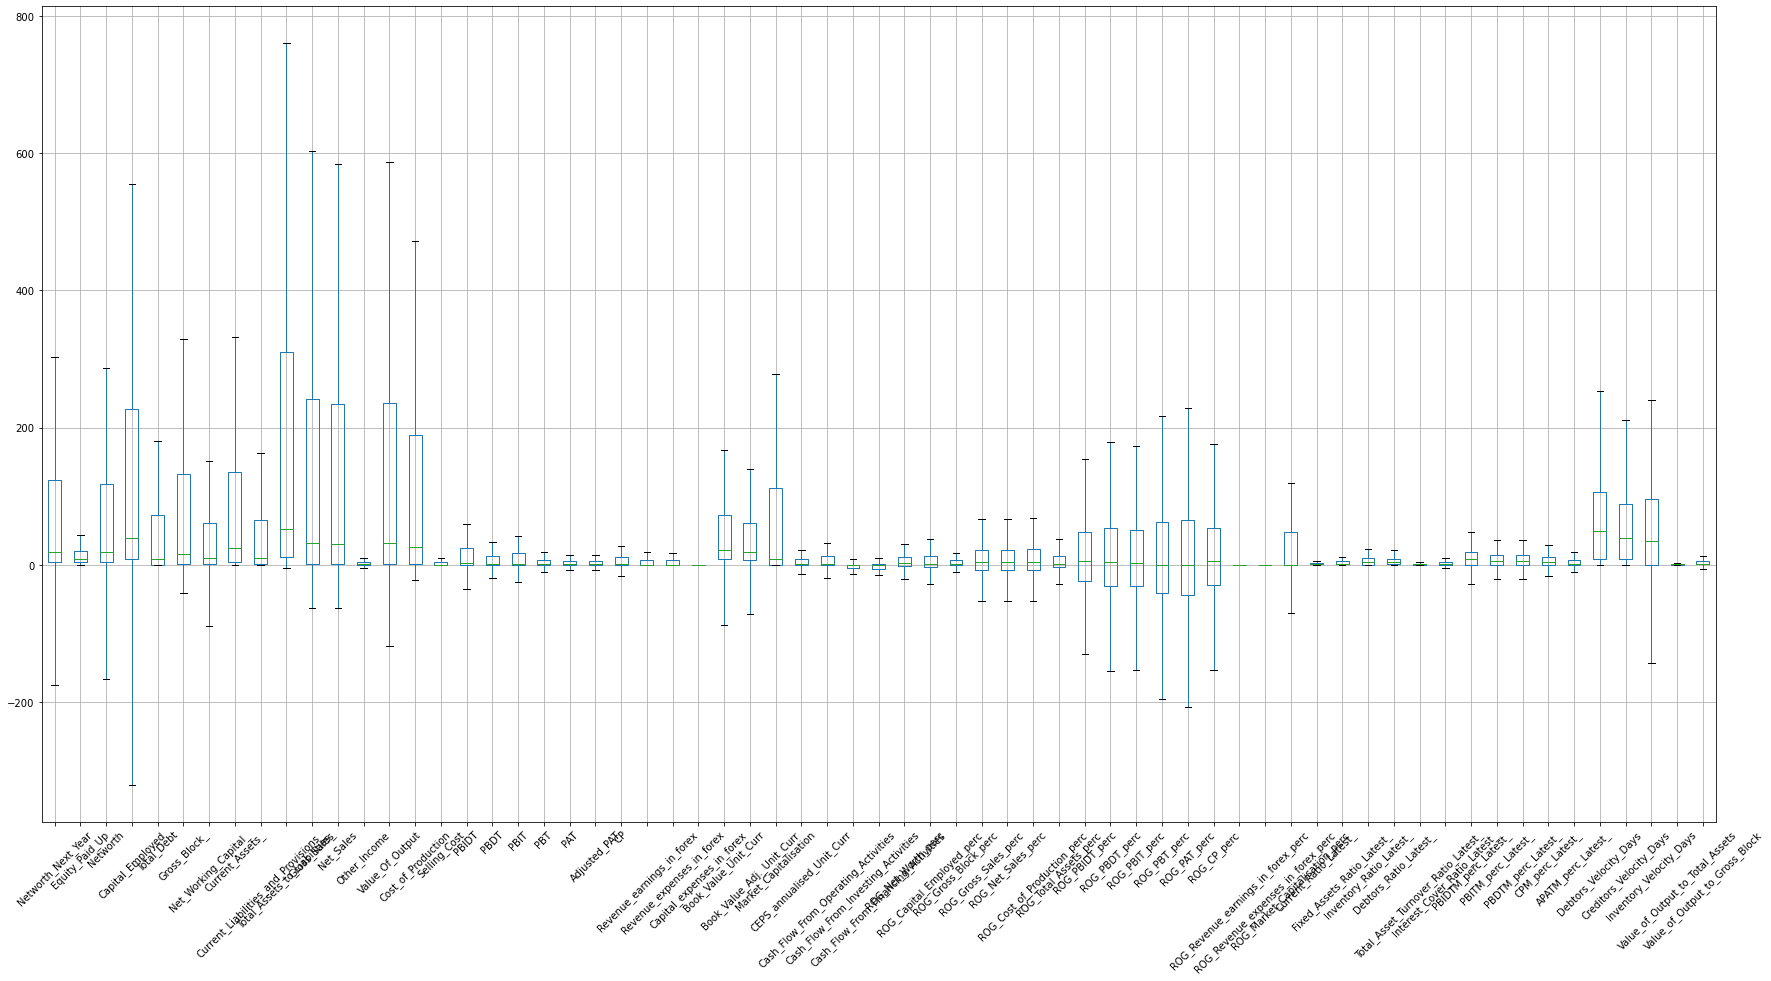

In [56]:
plt.figure(figsize=(30,15))
Company_num[cont].boxplot()
plt.xticks(rotation=45)

<AxesSubplot:>

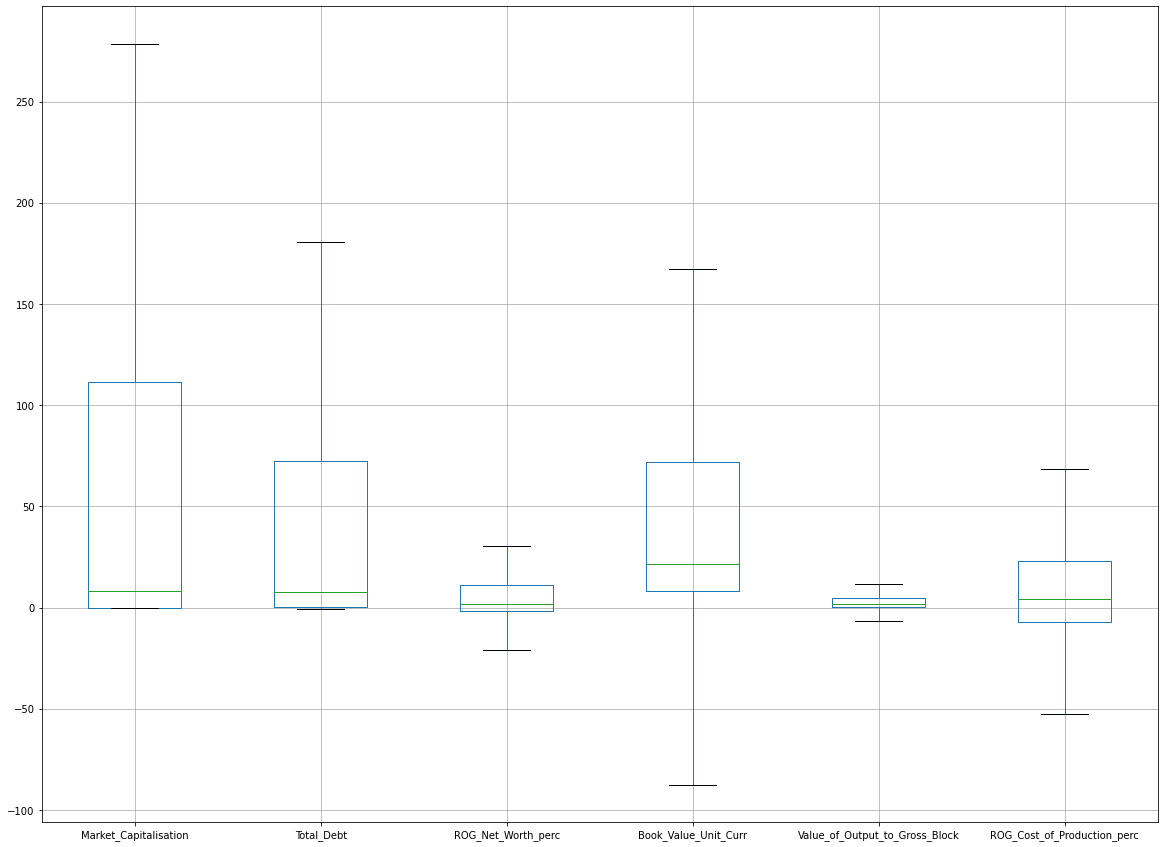

In [57]:
plt.figure(figsize=(20,15))
Company_num[cont].boxplot(column=['Market_Capitalisation', 'Total_Debt', 'ROG_Net_Worth_perc','Book_Value_Unit_Curr', 'Value_of_Output_to_Gross_Block', 'ROG_Cost_of_Production_perc'])

<AxesSubplot:ylabel='Frequency'>

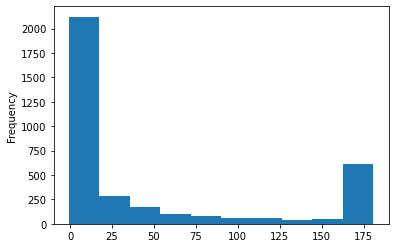

In [58]:
Company_num[cont]["Total_Debt"].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

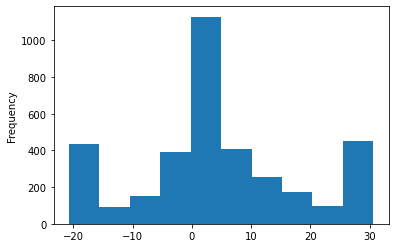

In [59]:
Company_num[cont]["ROG_Net_Worth_perc"].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

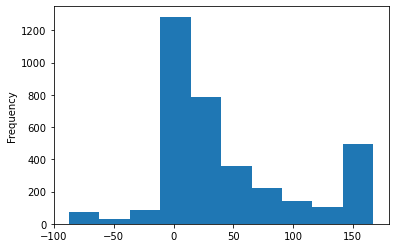

In [60]:
Company_num[cont]["Book_Value_Unit_Curr"].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

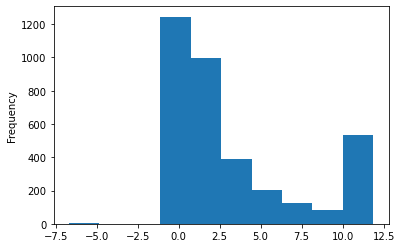

In [61]:
Company_num[cont]["Value_of_Output_to_Gross_Block"].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

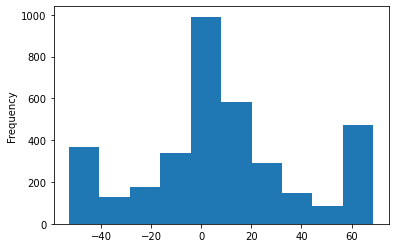

In [62]:
Company_num[cont]["ROG_Cost_of_Production_perc"].plot(kind='hist')

<AxesSubplot:xlabel='default', ylabel='Market_Capitalisation'>

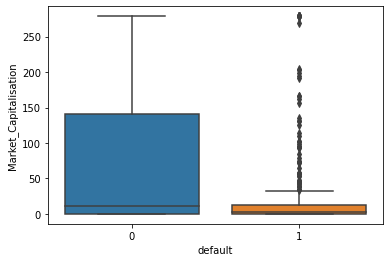

In [63]:
sns.boxplot(x=Company['default'],y=Company_num[cont]['Market_Capitalisation'])

<AxesSubplot:xlabel='default', ylabel='Total_Debt'>

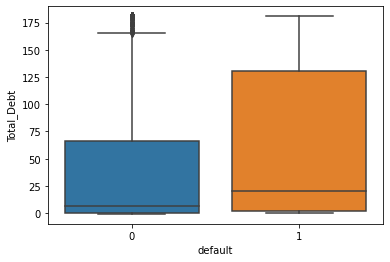

In [64]:
sns.boxplot(x=Company['default'],y=Company_num[cont]['Total_Debt'])

<AxesSubplot:xlabel='default', ylabel='ROG_Net_Worth_perc'>

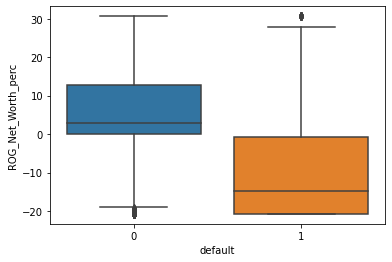

In [65]:
sns.boxplot(x=Company['default'],y=Company_num[cont]['ROG_Net_Worth_perc'])

<AxesSubplot:xlabel='default', ylabel='Book_Value_Unit_Curr'>

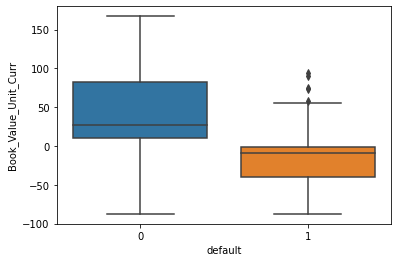

In [66]:
sns.boxplot(x=Company['default'],y=Company_num[cont]['Book_Value_Unit_Curr'])

<AxesSubplot:xlabel='default', ylabel='Value_of_Output_to_Gross_Block'>

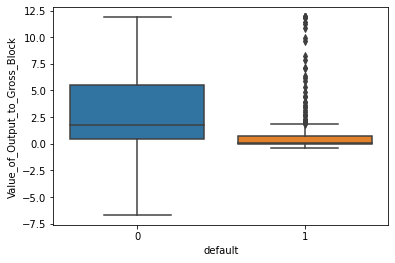

In [67]:
sns.boxplot(x=Company['default'],y=Company_num[cont]['Value_of_Output_to_Gross_Block'])

<AxesSubplot:xlabel='default', ylabel='CPM_perc_Latest_'>

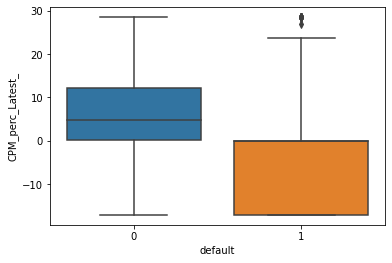

In [68]:
sns.boxplot(x=Company['default'],y=Company_num[cont]['CPM_perc_Latest_'])

<AxesSubplot:>

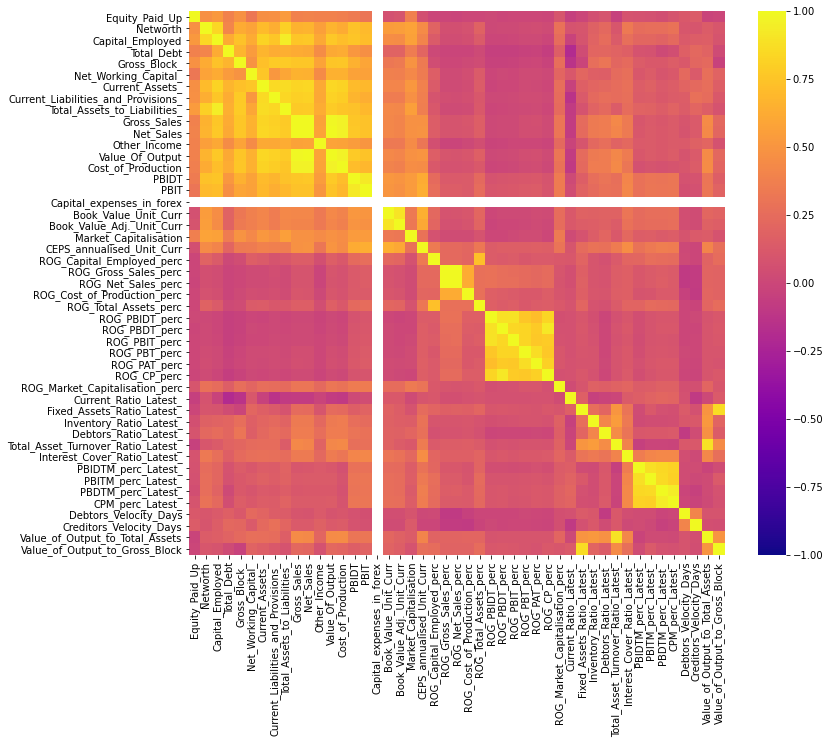

In [69]:
plt.figure(figsize = (12,10 ))
cor_matrix = Company_imputed.drop('default', axis = 1).corr()
sns.heatmap(cor_matrix, cmap = 'plasma', vmin = -1, vmax= 1)

## Train Test Split

In [70]:
predictors = Company_imputed.drop('default', axis = 1)
response = Company_imputed['default']

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#### Splitting the data into train and test sets

In [72]:
X_train, X_test, y_train, y_test = train_test_split(predictors, response, test_size = 0.33, random_state = 42)

## logistic regressiion model

#### For modeling we will use Logistic Regression with recursive feature elimination

In [73]:
LR = LogisticRegression()

In [74]:
selector_log = RFE(estimator = LR, n_features_to_select=15, step=1)

In [75]:
selector_lo = selector_log.fit(X_train, y_train)

#### Validating the model on train and test set

In [76]:
from sklearn.metrics import confusion_matrix, classification_report

In [77]:
pred_train_log = selector_log.predict(X_train)
pred_test_log = selector_log.predict(X_test)

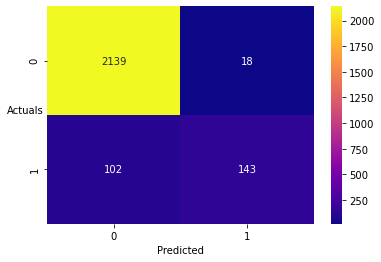

In [78]:
sns.heatmap((confusion_matrix(y_train,pred_train_log)),annot=True,fmt='.5g',cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [79]:
log_train_acc= selector_log.score(X_train,y_train)
print('Accuracy of Train Data =',round(log_train_acc,2)*100)

Accuracy of Train Data = 95.0


In [80]:
print(classification_report(y_train, pred_train_log))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      2157
         1.0       0.89      0.58      0.70       245

    accuracy                           0.95      2402
   macro avg       0.92      0.79      0.84      2402
weighted avg       0.95      0.95      0.95      2402



In [81]:
log_metrics_train= classification_report(y_train, pred_train_log,output_dict=True)
Company_imputed= pd.DataFrame(log_metrics_train).transpose()
log_train_f1= round(Company_imputed.loc["1.0"][2],2)
log_train_recall= round(Company_imputed.loc["1.0"][1],2)
log_train_precision= round(Company_imputed.loc["1.0"][0],2)
print ('log_train_precision ',log_train_precision)
print ('log_train_recall ',log_train_recall)
print ('log_train_f1 ',log_train_f1)

log_train_precision  0.89
log_train_recall  0.58
log_train_f1  0.7


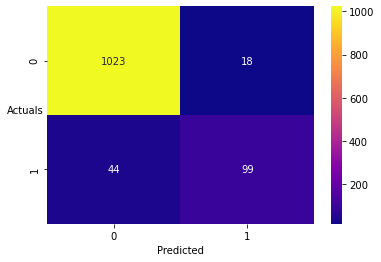

In [82]:
sns.heatmap((confusion_matrix(y_test,pred_test_log)),annot=True,fmt='.5g',cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [83]:
log_test_acc= selector_log.score(X_test,y_test)
print('Accuracy of Test Data =',round(log_test_acc,2)*100)

Accuracy of Test Data = 95.0


In [84]:
print(classification_report(y_test, pred_test_log))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1041
         1.0       0.85      0.69      0.76       143

    accuracy                           0.95      1184
   macro avg       0.90      0.84      0.87      1184
weighted avg       0.95      0.95      0.95      1184



In [85]:
log_metrics_test= classification_report(y_test, pred_test_log,output_dict=True)
Company_imputed= pd.DataFrame(log_metrics_test).transpose()
log_test_f1= round(Company_imputed.loc["1.0"][2],2)
log_test_recall= round(Company_imputed.loc["1.0"][1],2)
log_test_precision= round(Company_imputed.loc["1.0"][0],2)
print ('log_test_precision ',log_test_precision)
print ('log_test_recall ',log_test_recall)
print ('log_test_f1 ',log_test_f1)

log_test_precision  0.85
log_test_recall  0.69
log_test_f1  0.76


In [86]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [87]:
pred_train_log_prob = selector_log.predict_proba(X_train)
pred_train_log_prob
pd.DataFrame(pred_train_log_prob).head()

,0,1
0,0.89,0.11
1,1.00,0.00
2,0.92,0.08
3,1.00,0.00
4,1.00,0.00


Area under Curve is 0.954


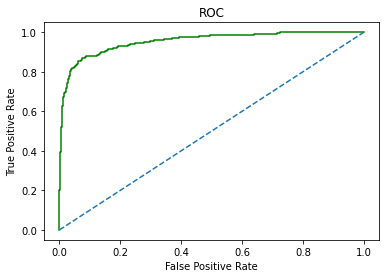

In [88]:
log_train_fpr, log_train_tpr,_=roc_curve(y_train,selector_log.predict_proba(X_train)[:,1])
plt.plot(log_train_fpr,log_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
log_train_auc=roc_auc_score(y_train,selector_log.predict_proba(X_train)[:,1])
print('Area under Curve is', round(log_train_auc,3))

In [89]:
pred_test_log_prob = selector_log.predict_proba(X_test)
pred_test_log_prob
pd.DataFrame(pred_test_log_prob).head()

,0,1
0,0.99,0.01
1,1.00,0.00
2,0.89,0.11
3,0.08,0.92
4,0.99,0.01


Area under Curve is 0.972


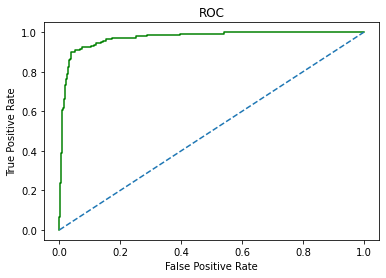

In [90]:
log_test_fpr, log_test_tpr,_=roc_curve(y_test,selector_log.predict_proba(X_test)[:,1])
plt.plot(log_test_fpr,log_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
log_test_auc=roc_auc_score(y_test,selector_log.predict_proba(X_test)[:,1])
print('Area under Curve is', round(log_test_auc,3))

### Using SMOTE

In [91]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [92]:
selector_log_smote = selector_log.fit(X_res, y_res)

In [93]:
pred_train_log_smote = selector_log_smote.predict(X_res)
pred_test_log_smote = selector_log_smote.predict(X_test)

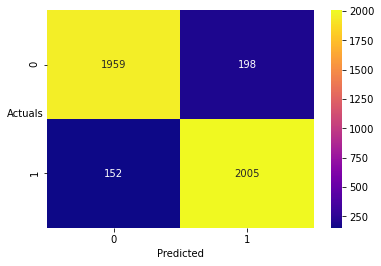

In [94]:
sns.heatmap((confusion_matrix(y_res,pred_train_log_smote)),annot=True,fmt='.5g',cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [95]:
log_train_smote_acc= selector_log.score(X_res,y_res)
print('Accuracy of Train Data using smote =',round(log_train_smote_acc,2)*100)

Accuracy of Train Data using smote = 92.0


In [96]:
print(classification_report(y_res, pred_train_log_smote))

              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92      2157
         1.0       0.91      0.93      0.92      2157

    accuracy                           0.92      4314
   macro avg       0.92      0.92      0.92      4314
weighted avg       0.92      0.92      0.92      4314



In [97]:
log_metrics_train_smote= classification_report(y_res, pred_train_log_smote,output_dict=True)
Company_imputed= pd.DataFrame(log_metrics_train_smote).transpose()
log_train_smote_f1= round(Company_imputed.loc["1.0"][2],2)
log_train_smote_recall= round(Company_imputed.loc["1.0"][1],2)
log_train_smote_precision= round(Company_imputed.loc["1.0"][0],2)
print ('log_train_smote_precision ',log_train_smote_precision)
print ('log_train_smote_recall ',log_train_smote_recall)
print ('log_train_smote_f1 ',log_train_smote_f1)

log_train_smote_precision  0.91
log_train_smote_recall  0.93
log_train_smote_f1  0.92


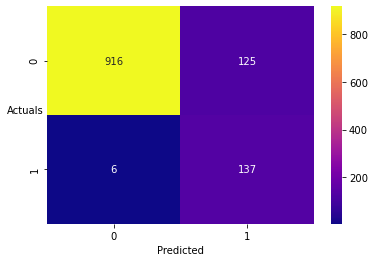

In [98]:
sns.heatmap((confusion_matrix(y_test,pred_test_log_smote)),annot=True,fmt='.5g',cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [99]:
log_test_smote_acc= selector_log.score(X_test,y_test)
print('Accuracy of Test Data using smote =',round(log_test_smote_acc,2)*100)

Accuracy of Test Data using smote = 89.0


In [100]:
print(classification_report(y_test, pred_test_log_smote))

              precision    recall  f1-score   support

         0.0       0.99      0.88      0.93      1041
         1.0       0.52      0.96      0.68       143

    accuracy                           0.89      1184
   macro avg       0.76      0.92      0.80      1184
weighted avg       0.94      0.89      0.90      1184



In [101]:
log_metrics_test_smote= classification_report(y_test, pred_test_log_smote,output_dict=True)
Company_imputed= pd.DataFrame(log_metrics_test_smote).transpose()
log_test_smote_f1= round(Company_imputed.loc["1.0"][2],2)
log_test_smote_recall= round(Company_imputed.loc["1.0"][1],2)
log_test_smote_precision= round(Company_imputed.loc["1.0"][0],2)
print ('log_test_smote_precision ',log_test_smote_precision)
print ('log_test_smote_recall ',log_test_smote_recall)
print ('log_test_smote_f1 ',log_test_smote_f1)

log_test_smote_precision  0.52
log_test_smote_recall  0.96
log_test_smote_f1  0.68


In [102]:
pred_train_log_smote_prob = selector_log_smote.predict_proba(X_res)
pred_train_log_smote_prob
pd.DataFrame(pred_train_log_smote_prob).head()

,0,1
0,0.60,0.40
1,1.00,0.00
2,0.34,0.66
3,1.00,0.00
4,0.99,0.01


Area under Curve is 0.971


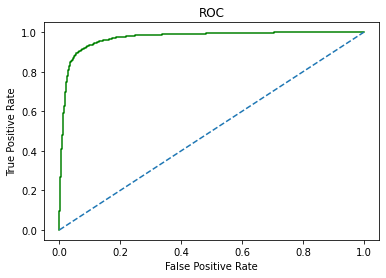

In [103]:
log_train_smote_fpr, log_train_smote_tpr,_=roc_curve(y_res,selector_log_smote.predict_proba(X_res)[:,1])
plt.plot(log_train_smote_fpr,log_train_smote_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
log_train_smote_auc=roc_auc_score(y_res,selector_log_smote.predict_proba(X_res)[:,1])
print('Area under Curve is', round(log_train_smote_auc,3))

In [104]:
pred_test_log_smote_prob = selector_log_smote.predict_proba(X_test)
pred_test_log_smote_prob
pd.DataFrame(pred_test_log_smote_prob).head()

,0,1
0,0.99,0.01
1,1.00,0.00
2,0.53,0.47
3,0.00,1.00
4,0.98,0.02


Area under Curve is 0.973


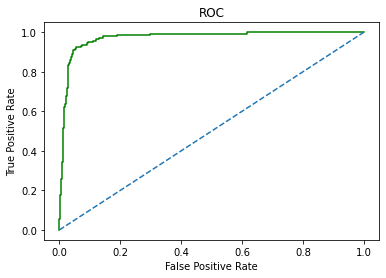

In [105]:
log_test_smote_fpr, log_test_smote_tpr,_=roc_curve(y_test,selector_log_smote.predict_proba(X_test)[:,1])
plt.plot(log_test_smote_fpr,log_test_smote_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
log_test_smote_auc=roc_auc_score(y_test,selector_log_smote.predict_proba(X_test)[:,1])
print('Area under Curve is', round(log_test_smote_auc,3))

In [176]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']

data = pd.DataFrame({'Log Train':[log_train_acc,log_train_auc,log_train_recall,log_train_precision,log_train_f1],
    'Log Test':[log_test_acc,log_test_auc,log_test_recall,log_test_precision,log_test_f1],
    'Log Train with SMOTE':[log_train_smote_acc,log_train_smote_auc,log_train_smote_recall,log_train_smote_precision,log_train_smote_f1],
    'Log Test with SMOTE':[log_test_smote_acc,log_test_smote_auc,log_test_smote_recall,log_test_smote_precision,log_test_smote_f1]},
                    index=index).T

round(data,2)

,Accuracy,AUC,Recall,Precision,F1 Score
Log Train,0.95,0.95,0.58,0.89,0.70
Log Test,0.95,0.97,0.69,0.85,0.76
Log Train with SMOTE,0.92,0.97,0.93,0.91,0.92
Log Test with SMOTE,0.89,0.97,0.96,0.52,0.68


## 1.8 Build a Random Forest Model on Train Dataset. Also showcase your model building approach
## 1.9 Validate the Random Forest Model on test Dataset and state the performance matrices. Also state interpretation from the model

## Random Forest Classifier

In [106]:
param_grid = {
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [30, 60, 90],
    'min_samples_split': [90, 180, 270],
    'n_estimators': [50, 100, 150]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid)

In [107]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [30, 60, 90],
                         'min_samples_split': [90, 180, 270],
                         'n_estimators': [50, 100, 150]})

In [108]:
grid_search.best_params_

{'max_depth': 20,
 'min_samples_leaf': 30,
 'min_samples_split': 90,
 'n_estimators': 100}

In [109]:
best_grid = grid_search.best_estimator_

In [110]:
pred_train_rf = best_grid.predict(X_train)
pred_test_rf = best_grid.predict(X_test)

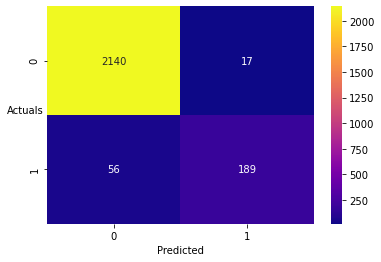

In [111]:
sns.heatmap((confusion_matrix(y_train,pred_train_rf)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [112]:
rf_train_acc= best_grid.score(X_train,y_train)
print('Accuracy of Train Data =',round(rf_train_acc,3)*100)

Accuracy of Train Data = 97.0


In [113]:
print(classification_report(y_train, pred_train_rf))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      2157
         1.0       0.92      0.77      0.84       245

    accuracy                           0.97      2402
   macro avg       0.95      0.88      0.91      2402
weighted avg       0.97      0.97      0.97      2402



In [114]:
rf_metrics_train= classification_report(y_train, pred_train_rf,output_dict=True)
Company_imputed= pd.DataFrame(rf_metrics_train).transpose()
rf_train_f1=round(Company_imputed.loc["1.0"][2],2)
rf_train_recall=round(Company_imputed.loc["1.0"][1],2)
rf_train_precision=round(Company_imputed.loc["1.0"][0],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.92
rf_train_recall  0.77
rf_train_f1  0.84


In [115]:
pred_train_rf_prob = best_grid.predict_proba(X_train)
pred_train_rf_prob
pd.DataFrame(pred_train_rf_prob).head()

,0,1
0,0.98,0.02
1,1.00,0.00
2,0.90,0.10
3,0.94,0.06
4,1.00,0.00


Area under Curve is 0.991


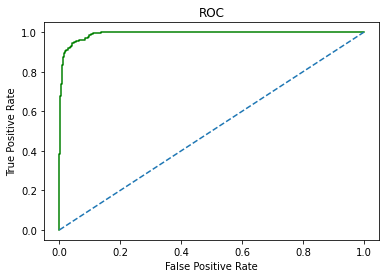

In [116]:
rf_train_fpr, rf_train_tpr,_=roc_curve(y_train,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(y_train,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', round(rf_train_auc,3))

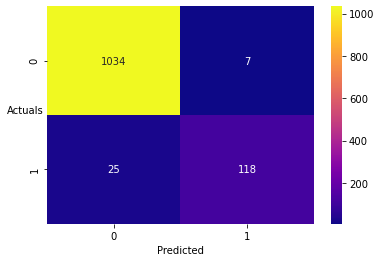

In [117]:
sns.heatmap((confusion_matrix(y_test, pred_test_rf)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [118]:
rf_test_acc= best_grid.score(X_test,y_test)
print('Accuracy of Test Data =',round(rf_test_acc,4)*100)

Accuracy of Test Data = 97.3


In [119]:
print(metrics.classification_report(y_test, pred_test_rf))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      1041
         1.0       0.94      0.83      0.88       143

    accuracy                           0.97      1184
   macro avg       0.96      0.91      0.93      1184
weighted avg       0.97      0.97      0.97      1184



In [120]:
rf_metrics_test= classification_report(y_test, pred_test_rf,output_dict=True)
Company_imputed= pd.DataFrame(rf_metrics_test).transpose()
rf_test_f1=round(Company_imputed.loc["1.0"][2],2)
rf_test_recall=round(Company_imputed.loc["1.0"][1],2)
rf_test_precision=round(Company_imputed.loc["1.0"][0],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.94
rf_test_recall  0.83
rf_test_f1  0.88


In [121]:
pred_test_rf_prob = best_grid.predict_proba(X_test)
pred_test_rf_prob
pd.DataFrame(pred_test_rf_prob).head()

,0,1
0,0.98,0.02
1,0.98,0.02
2,0.91,0.09
3,0.17,0.83
4,0.95,0.05


Area under Curve is 0.99


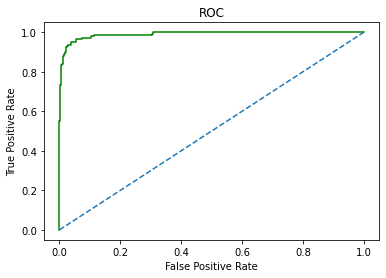

In [122]:
rf_test_fpr, rf_test_tpr,_=roc_curve(y_test,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(y_test,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', round(rf_test_auc,3))

In [123]:
print(pd.DataFrame(best_grid.feature_importances_, columns=['Imp'], index= X_train.columns).sort_values(by='Imp',ascending=False))

                                     Imp
Book_Value_Unit_Curr                0.26
Networth                            0.25
Book_Value_Adj._Unit_Curr           0.17
Current_Ratio_Latest_               0.06
Capital_Employed                    0.05
Net_Working_Capital_                0.04
PBIDT                               0.03
CEPS_annualised_Unit_Curr           0.03
PBIT                                0.02
PBITM_perc_Latest_                  0.01
Total_Debt                          0.01
Interest_Cover_Ratio_Latest_        0.01
PBDTM_perc_Latest_                  0.01
PBIDTM_perc_Latest_                 0.01
ROG_Capital_Employed_perc           0.01
Total_Assets_to_Liabilities_        0.01
Value_of_Output_to_Gross_Block      0.01
Fixed_Assets_Ratio_Latest_          0.00
CPM_perc_Latest_                    0.00
Total_Asset_Turnover_Ratio_Latest_  0.00
Current_Assets_                     0.00
ROG_Total_Assets_perc               0.00
Gross_Block_                        0.00
Current_Liabilit

### Using SMOTE

In [124]:
grid_search_smote = GridSearchCV(estimator = rfcl, param_grid = param_grid)

In [125]:
grid_search_smote.fit(X_res, y_res)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [30, 60, 90],
                         'min_samples_split': [90, 180, 270],
                         'n_estimators': [50, 100, 150]})

In [126]:
grid_search_smote.best_params_

{'max_depth': 30,
 'min_samples_leaf': 30,
 'min_samples_split': 90,
 'n_estimators': 100}

In [127]:
best_grid_smote = grid_search_smote.best_estimator_

In [128]:
pred_train_rf_smote = best_grid_smote.predict(X_res)
pred_test_rf_smote = best_grid_smote.predict(X_test)

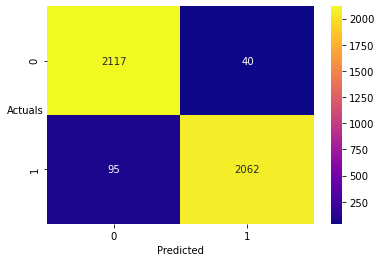

In [129]:
sns.heatmap((confusion_matrix(y_res,pred_train_rf_smote)),annot=True,fmt='.5g',cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [130]:
rf_train_smote_acc= best_grid_smote.score(X_res,y_res)
print('Accuracy of Train Data using smote =',round(rf_train_smote_acc,4)*100)

Accuracy of Train Data using smote = 96.87


In [131]:
print(metrics.classification_report(y_res, pred_train_rf_smote))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      2157
         1.0       0.98      0.96      0.97      2157

    accuracy                           0.97      4314
   macro avg       0.97      0.97      0.97      4314
weighted avg       0.97      0.97      0.97      4314



In [132]:
rf_metrics_train_smote= classification_report(y_res, pred_train_rf_smote,output_dict=True)
Company_imputed= pd.DataFrame(rf_metrics_train_smote).transpose()
rf_train_smote_f1=round(Company_imputed.loc["1.0"][2],2)
rf_train_smote_recall=round(Company_imputed.loc["1.0"][1],2)
rf_train_smote_precision=round(Company_imputed.loc["1.0"][0],2)
print ('rf_train_smote_precision ',rf_train_smote_precision)
print ('rf_train_smote_recall ',rf_train_smote_recall)
print ('rf_train_smote_f1 ',rf_train_smote_f1)

rf_train_smote_precision  0.98
rf_train_smote_recall  0.96
rf_train_smote_f1  0.97


In [133]:
pred_train_rf_smote_prob = best_grid_smote.predict_proba(X_res)
pred_train_rf_smote_prob
pd.DataFrame(pred_train_rf_smote_prob).head()

,0,1
0,0.92,0.08
1,0.97,0.03
2,0.63,0.37
3,0.82,0.18
4,1.00,0.00


Area under Curve is 0.997


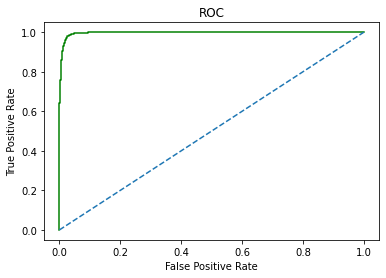

In [134]:
rf_train_smote_fpr, rf_train_smote_tpr,_=roc_curve(y_res,best_grid_smote.predict_proba(X_res)[:,1])
plt.plot(rf_train_smote_fpr,rf_train_smote_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_smote_auc=roc_auc_score(y_res,best_grid_smote.predict_proba(X_res)[:,1])
print('Area under Curve is', round(rf_train_smote_auc,3))

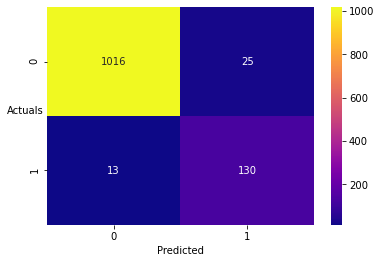

In [135]:
sns.heatmap((confusion_matrix(y_test, pred_test_rf_smote)),annot=True,fmt='.5g',cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [136]:
rf_test_smote_acc= best_grid_smote.score(X_test,y_test)
print('Accuracy of Test Data using smote =',round(rf_test_smote_acc,4)*100)

Accuracy of Test Data using smote = 96.78999999999999


In [137]:
print(metrics.classification_report(y_test, pred_test_rf_smote))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      1041
         1.0       0.84      0.91      0.87       143

    accuracy                           0.97      1184
   macro avg       0.91      0.94      0.93      1184
weighted avg       0.97      0.97      0.97      1184



In [138]:
rf_metrics_test_smote= classification_report(y_test, pred_test_rf_smote,output_dict=True)
Company_imputed= pd.DataFrame(rf_metrics_test_smote).transpose()
rf_test_smote_f1= round(Company_imputed.loc["1.0"][2],2)
rf_test_smote_recall=round(Company_imputed.loc["1.0"][1],2)
rf_test_smote_precision=round(Company_imputed.loc["1.0"][0],2)
print ('rf_test_smote_precision ',rf_test_smote_precision)
print ('rf_test_smote_recall ',rf_test_smote_recall)
print ('rf_test_smote_f1 ',rf_test_smote_f1)

rf_test_smote_precision  0.84
rf_test_smote_recall  0.91
rf_test_smote_f1  0.87


In [139]:
pred_test_rf_smote_prob = best_grid.predict_proba(X_test)
pred_test_rf_smote_prob
pd.DataFrame(pred_test_rf_smote_prob).head()

,0,1
0,0.98,0.02
1,0.98,0.02
2,0.91,0.09
3,0.17,0.83
4,0.95,0.05


Area under Curve is 0.99


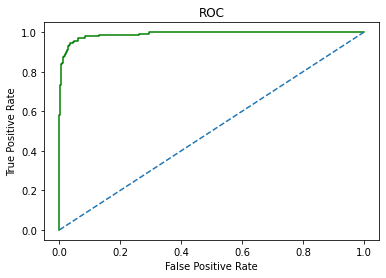

In [140]:
rf_test_smote_fpr, rf_test_smote_tpr,_=roc_curve(y_test,best_grid_smote.predict_proba(X_test)[:,1])
plt.plot(rf_test_smote_fpr,rf_test_smote_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_smote_auc=roc_auc_score(y_test,best_grid_smote.predict_proba(X_test)[:,1])
print('Area under Curve is', round(rf_test_smote_auc,3))

In [177]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']

data = pd.DataFrame({'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
    'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
    'Random Forest Train with SMOTE':[rf_train_smote_acc,rf_train_smote_auc,rf_train_smote_recall,rf_train_smote_precision,rf_train_smote_f1],
    'Random Forest Test with SMOTE':[rf_test_smote_acc,rf_test_smote_auc,rf_test_smote_recall,rf_test_smote_precision,rf_test_smote_f1]},
       index=index).T

round(data,2)             

,Accuracy,AUC,Recall,Precision,F1 Score
Random Forest Train,0.97,0.99,0.77,0.92,0.84
Random Forest Test,0.97,0.99,0.83,0.94,0.88
Random Forest Train with SMOTE,0.97,1.00,0.96,0.98,0.97
Random Forest Test with SMOTE,0.97,0.99,0.91,0.84,0.87


In [141]:
print(pd.DataFrame(best_grid_smote.feature_importances_, columns=['Imp'], index= X_train.columns).sort_values(by='Imp',ascending=False))

                                     Imp
Book_Value_Unit_Curr                0.21
Networth                            0.20
Book_Value_Adj._Unit_Curr           0.17
Current_Ratio_Latest_               0.08
CEPS_annualised_Unit_Curr           0.05
PBIDT                               0.05
Interest_Cover_Ratio_Latest_        0.03
PBIT                                0.02
PBITM_perc_Latest_                  0.02
PBDTM_perc_Latest_                  0.02
Total_Debt                          0.02
Net_Working_Capital_                0.02
PBIDTM_perc_Latest_                 0.02
Capital_Employed                    0.01
ROG_Gross_Sales_perc                0.01
CPM_perc_Latest_                    0.01
ROG_Net_Sales_perc                  0.01
Value_of_Output_to_Gross_Block      0.01
Current_Liabilities_and_Provisions_ 0.01
ROG_Cost_of_Production_perc         0.01
Fixed_Assets_Ratio_Latest_          0.01
Gross_Block_                        0.00
Gross_Sales                         0.00
Cost_of_Producti

## 1.10 Build a LDA Model on Train Dataset. Also showcase your model building approach
## 1.11 Validate the LDA Model on test Dataset and state the performance matrices. Also state interpretation from the model

## Linear Discriminant Analysis

In [142]:
LDA = LinearDiscriminantAnalysis()

In [143]:
selector_lda = RFE(estimator = LDA, n_features_to_select=15, step=1)

In [144]:
selector_la = selector_lda.fit(X_train, y_train)

In [145]:
pred_train_lda = selector_lda.predict(X_train)
pred_test_lda = selector_lda.predict(X_test)

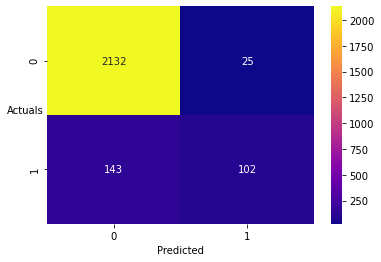

In [146]:
sns.heatmap((confusion_matrix(y_train,pred_train_lda)),annot=True,fmt='.5g',cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [147]:
lda_train_acc= selector_lda.score(X_train,y_train)
print('Accuracy of Train Data =',round(lda_train_acc,2)*100)

Accuracy of Train Data = 93.0


In [148]:
print(classification_report(y_train, pred_train_lda))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96      2157
         1.0       0.80      0.42      0.55       245

    accuracy                           0.93      2402
   macro avg       0.87      0.70      0.76      2402
weighted avg       0.92      0.93      0.92      2402



In [149]:
lda_metrics_train= classification_report(y_train, pred_train_lda,output_dict=True)
Company_imputed= pd.DataFrame(lda_metrics_train).transpose()
lda_train_f1= round(Company_imputed.loc["1.0"][2],2)
lda_train_recall= round(Company_imputed.loc["1.0"][1],2)
lda_train_precision= round(Company_imputed.loc["1.0"][0],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)

lda_train_precision  0.8
lda_train_recall  0.42
lda_train_f1  0.55


In [150]:
pred_train_lda_prob = selector_lda.predict_proba(X_train)
pred_train_lda_prob
pd.DataFrame(pred_train_lda_prob).head()

,0,1
0,0.93,0.07
1,0.99,0.01
2,0.79,0.21
3,1.00,0.00
4,1.00,0.00


Area under Curve is 0.94


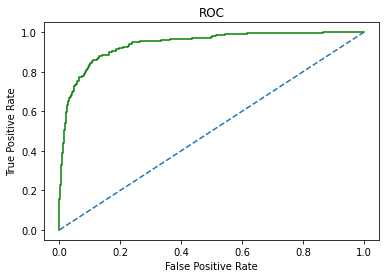

In [151]:
lda_train_fpr, lda_train_tpr,_=roc_curve(y_train,selector_lda.predict_proba(X_train)[:,1])
plt.plot(lda_train_fpr,lda_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
lda_train_auc=roc_auc_score(y_train,selector_lda.predict_proba(X_train)[:,1])
print('Area under Curve is', round(lda_train_auc,3))

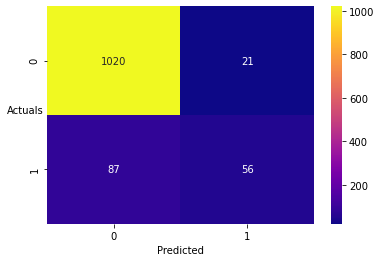

In [152]:
sns.heatmap((confusion_matrix(y_test,pred_test_lda)),annot=True,fmt='.5g',cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [153]:
lda_test_acc= selector_lda.score(X_test,y_test)
print('Accuracy of Test Data =',round(lda_test_acc,4)*100)

Accuracy of Test Data = 90.88000000000001


In [154]:
print(classification_report(y_test,pred_test_lda))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1041
         1.0       0.73      0.39      0.51       143

    accuracy                           0.91      1184
   macro avg       0.82      0.69      0.73      1184
weighted avg       0.90      0.91      0.90      1184



In [155]:
lda_metrics_test= classification_report(y_test, pred_test_lda,output_dict=True)
Company_imputed= pd.DataFrame(lda_metrics_test).transpose()
lda_test_f1= round(Company_imputed.loc["1.0"][2],2)
lda_test_recall= round(Company_imputed.loc["1.0"][1],2)
lda_test_precision= round(Company_imputed.loc["1.0"][0],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_test_precision  0.73
lda_test_recall  0.39
lda_test_f1  0.51


In [156]:
pred_test_lda_prob = selector_lda.predict_proba(X_test)
pred_test_lda_prob
pd.DataFrame(pred_test_lda_prob).head()

,0,1
0,0.96,0.04
1,0.99,0.01
2,0.93,0.07
3,0.67,0.33
4,1.00,0.00


Area under Curve is 0.944


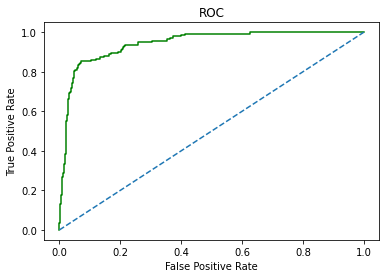

In [157]:
lda_test_fpr, lda_test_tpr,_=roc_curve(y_test,selector_lda.predict_proba(X_test)[:,1])
plt.plot(lda_test_fpr,lda_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
lda_test_auc=roc_auc_score(y_test,selector_lda.predict_proba(X_test)[:,1])
print('Area under Curve is', round(lda_test_auc,3))

### Using SMOTE

In [158]:
selector_lda_smote = selector_lda.fit(X_res, y_res)

In [159]:
pred_train_lda_smote = selector_lda_smote.predict(X_res)
pred_test_lda_smote = selector_lda_smote.predict(X_test)

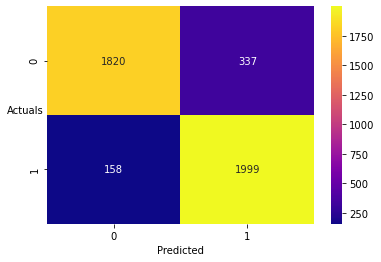

In [160]:
sns.heatmap((confusion_matrix(y_res,pred_train_lda_smote)),annot=True,fmt='.5g',cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [161]:
lda_train_smote_acc= selector_lda_smote.score(X_res,y_res)
print('Accuracy of Train Data using smote =',round(lda_train_smote_acc,4)*100)

Accuracy of Train Data using smote = 88.53


In [162]:
print(classification_report(y_res, pred_train_lda_smote))

              precision    recall  f1-score   support

         0.0       0.92      0.84      0.88      2157
         1.0       0.86      0.93      0.89      2157

    accuracy                           0.89      4314
   macro avg       0.89      0.89      0.89      4314
weighted avg       0.89      0.89      0.89      4314



In [163]:
lda_metrics_train_smote= classification_report(y_res, pred_train_lda_smote,output_dict=True)
Company_imputed= pd.DataFrame(lda_metrics_train_smote).transpose()
lda_train_smote_f1= round(Company_imputed.loc["1.0"][2],2)
lda_train_smote_recall= round(Company_imputed.loc["1.0"][1],2)
lda_train_smote_precision= round(Company_imputed.loc["1.0"][0],2)
print ('lda_train_smote_precision ',lda_train_smote_precision)
print ('lda_train_smote_recall ',lda_train_smote_recall)
print ('lda_train_smote_f1 ',lda_train_smote_f1)

lda_train_smote_precision  0.86
lda_train_smote_recall  0.93
lda_train_smote_f1  0.89


In [164]:
pred_train_lda_smote_prob = selector_lda_smote.predict_proba(X_res)
pred_train_lda_smote_prob
pd.DataFrame(pred_train_lda_smote_prob).head()

,0,1
0,0.44,0.56
1,0.91,0.09
2,0.40,0.60
3,1.00,0.00
4,0.97,0.03


Area under Curve is 0.955


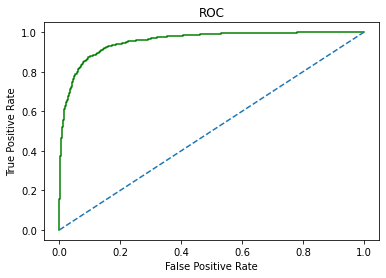

In [165]:
lda_train_smote_fpr, lda_train_smote_tpr,_=roc_curve(y_res,selector_lda_smote.predict_proba(X_res)[:,1])
plt.plot(lda_train_smote_fpr,lda_train_smote_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
lda_train_smote_auc=roc_auc_score(y_res,selector_lda_smote.predict_proba(X_res)[:,1])
print('Area under Curve is', round(lda_train_smote_auc,3))

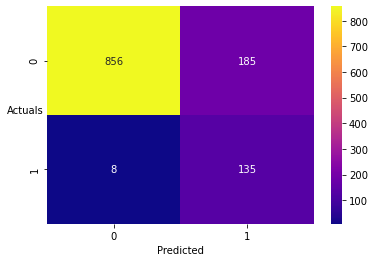

In [166]:
sns.heatmap((confusion_matrix(y_test,pred_test_lda_smote)),annot=True,fmt='.5g',cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [167]:
lda_test_smote_acc= selector_lda_smote.score(X_test,y_test)
print('Accuracy of Test Data using smote =',round(lda_test_smote_acc,4)*100)

Accuracy of Test Data using smote = 83.7


In [168]:
print(classification_report(y_test, pred_test_lda_smote))

              precision    recall  f1-score   support

         0.0       0.99      0.82      0.90      1041
         1.0       0.42      0.94      0.58       143

    accuracy                           0.84      1184
   macro avg       0.71      0.88      0.74      1184
weighted avg       0.92      0.84      0.86      1184



In [169]:
lda_metrics_test_smote= classification_report(y_test, pred_test_lda_smote,output_dict=True)
Company_imputed= pd.DataFrame(lda_metrics_test_smote).transpose()
lda_test_smote_f1= round(Company_imputed.loc["1.0"][2],2)
lda_test_smote_recall= round(Company_imputed.loc["1.0"][1],2)
lda_test_smote_precision= round(Company_imputed.loc["1.0"][0],2)
print ('lda_test_smote_precision ',lda_test_smote_precision)
print ('lda_test_smote_recall ',lda_test_smote_recall)
print ('lda_test_smote_f1 ',lda_test_smote_f1)

lda_test_smote_precision  0.42
lda_test_smote_recall  0.94
lda_test_smote_f1  0.58


In [170]:
pred_test_lda_smote_prob = selector_lda_smote.predict_proba(X_res)
pred_test_lda_smote_prob
pd.DataFrame(pred_test_lda_smote_prob).head()

,0,1
0,0.44,0.56
1,0.91,0.09
2,0.40,0.60
3,1.00,0.00
4,0.97,0.03


Area under Curve is 0.955


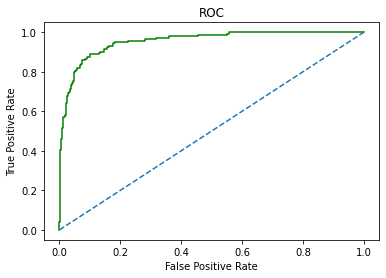

In [171]:
lda_test_smote_fpr, lda_test_smote_tpr,_=roc_curve(y_test,selector_lda_smote.predict_proba(X_test)[:,1])
plt.plot(lda_test_smote_fpr,lda_test_smote_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
lda_test_smote_auc=roc_auc_score(y_test,selector_lda_smote.predict_proba(X_test)[:,1])
print('Area under Curve is', round(lda_test_smote_auc,3))

In [178]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']

data = pd.DataFrame({'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
    'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],
    'LDA Train with SMOTE':[lda_train_smote_acc,lda_train_smote_auc,lda_train_smote_recall,lda_train_smote_precision,lda_train_smote_f1],
    'LDA Test with SMOTE':[lda_test_smote_acc,lda_test_smote_auc,lda_test_smote_recall,lda_test_smote_precision,lda_test_smote_f1]},
       index=index).T

round(data,2)   

,Accuracy,AUC,Recall,Precision,F1 Score
LDA Train,0.93,0.94,0.42,0.80,0.55
LDA Test,0.91,0.94,0.39,0.73,0.51
LDA Train with SMOTE,0.89,0.96,0.93,0.86,0.89
LDA Test with SMOTE,0.84,0.95,0.94,0.42,0.58


## 1.12 Compare the performances of Logistics, Radom Forest and LDA models (include ROC Curve)

## Comparison Summary

In [172]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']

data = pd.DataFrame({'Log Train':[log_train_acc,log_train_auc,log_train_recall,log_train_precision,log_train_f1],
    'Log Test':[log_test_acc,log_test_auc,log_test_recall,log_test_precision,log_test_f1],
    'Log Train with SMOTE':[log_train_smote_acc,log_train_smote_auc,log_train_smote_recall,log_train_smote_precision,log_train_smote_f1],
    'Log Test with SMOTE':[log_test_smote_acc,log_test_smote_auc,log_test_smote_recall,log_test_smote_precision,log_test_smote_f1],
    'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
    'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
    'Random Forest Train with SMOTE':[rf_train_smote_acc,rf_train_smote_auc,rf_train_smote_recall,rf_train_smote_precision,rf_train_smote_f1],
    'Random Forest Test with SMOTE':[rf_test_smote_acc,rf_test_smote_auc,rf_test_smote_recall,rf_test_smote_precision,rf_test_smote_f1],
    'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
    'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],
    'LDA Train with SMOTE':[lda_train_smote_acc,lda_train_smote_auc,lda_train_smote_recall,lda_train_smote_precision,lda_train_smote_f1],
    'LDA Test with SMOTE':[lda_test_smote_acc,lda_test_smote_auc,lda_test_smote_recall,lda_test_smote_precision,lda_test_smote_f1]},
    index=index).T

round(data,2)

,Accuracy,AUC,Recall,Precision,F1 Score
Log Train,0.95,0.95,0.58,0.89,0.70
Log Test,0.95,0.97,0.69,0.85,0.76
Log Train with SMOTE,0.92,0.97,0.93,0.91,0.92
Log Test with SMOTE,0.89,0.97,0.96,0.52,0.68
Random Forest Train,0.97,0.99,0.77,0.92,0.84
Random Forest Test,0.97,0.99,0.83,0.94,0.88
Random Forest Train with SMOTE,0.97,1.00,0.96,0.98,0.97
Random Forest Test with SMOTE,0.97,0.99,0.91,0.84,0.87
LDA Train,0.93,0.94,0.42,0.80,0.55
LDA Test,0.91,0.94,0.39,0.73,0.51


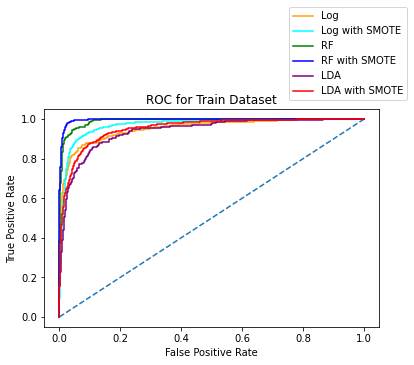

In [173]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(log_train_fpr, log_train_tpr,color='orange',label="Log")
plt.plot(log_train_smote_fpr, log_train_smote_tpr,color='cyan',label="Log with SMOTE")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(rf_train_smote_fpr,rf_train_smote_tpr,color='blue',label="RF with SMOTE")
plt.plot(lda_train_fpr,lda_train_tpr,color='purple',label="LDA")
plt.plot(lda_train_smote_fpr,lda_train_smote_tpr,color='red',label="LDA with SMOTE")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Train Dataset')
plt.legend(bbox_to_anchor=(0., 1.02, 1.10, .120), loc='lower right')
plt.show()

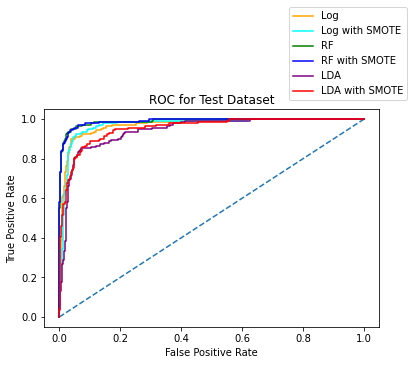

In [174]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(log_test_fpr, log_test_tpr,color='orange',label="Log")
plt.plot(log_test_smote_fpr, log_test_smote_tpr,color='cyan',label="Log with SMOTE")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(rf_test_smote_fpr,rf_test_smote_tpr,color='blue',label="RF with SMOTE")
plt.plot(lda_test_fpr,lda_test_tpr,color='purple',label="LDA")
plt.plot(lda_test_smote_fpr,lda_test_smote_tpr,color='red',label="LDA with SMOTE")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Test Dataset')
plt.legend(bbox_to_anchor=(0., 1.02, 1.10, .120), loc='lower right')
plt.show()

## The end